In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import scipy.io as sio 
import matplotlib.cm as cm

In [2]:
plt.rcParams['figure.figsize'] = [8.0, 4.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

In [3]:

'''
add_input_file:
dd: dictionary of particle data dictionaries. key = user defined label
filename: input file name (with relative path from this file)
label: file label e.g. 'case 1', 'case 2', ...
'''
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd


'''
plot_emittance: Required arguments:
sc:			string: space charge used (for plot titles only)
dd: 		dictionary of particle data dictionaries. key = user defined label
filename:	e.g. 'Testing' gives Testing_Emittances.png.
turns:		array of turns to plot at, default is 0,874,2185 which correspond to
			c170, c172, c175 (WS measurement times for MD4224)

Optional arguments:
legend_label:	title for legend
y limits are default unless 'ymin' and 'ymax' arguments are specified.
One may provide a plot title using the 'tit' argument.
'''
def plot_emittance(sc, dd, filename, turns=[0,874,2185], ymin=None, ymax=None, tit = None, legend_label = None):
		
	multiplier = 1./1E-6
	
	# First plot for epsn_x
	fig1 = plt.figure(figsize=(8, 8), facecolor='w', edgecolor='k')
	ax1 = fig1.add_subplot(211)	

	colors = cm.rainbow(np.linspace(0, 1, len(turns)))
	c_it = int(0)	
	
	ax1.set_xlabel(r'Q$_y$ [-]');
	ax1.set_ylabel(r'$\epsilon_x^n$ [mm mrad]')
	tit1 = sc + ' ' + 'Emittances'
	ax1.set_title(tit1);
	
	custom_lines = []
	custom_labels = []
	
	t_it = int(0)
	for t in sorted(turns):
		custom_lines.append(Line2D([0], [0], color=colors[t_it], lw=2))
		custom_labels.append(t)
		t_it = t_it +1		
	
	for t in sorted(turns):	
		for key, value in sorted(dd.iteritems()):	
			try:
				ax1.scatter(key, dd[key]['epsn_x'][0][t]*multiplier, color=colors[c_it]);
			except IndexError:
				print 'plot_emittance: index ', t , ' out of range for tune ', key
				continue
		c_it = c_it + 1	
			
	if ymin is not None:
		ax1.set_ylim(bottom = ymin)	
	if ymax is not None:
		ax1.set_ylim(top = ymax)
	
	ax1.grid(True);	
	
	if legend_label is not None: 		
		ax1.legend(custom_lines, custom_labels, title=legend_label)
	else:		
		ax1.legend(custom_lines, custom_labels)
	
	# Second plot for epsn_y
	ax2 = fig1.add_subplot(212)	
	
	colors = cm.rainbow(np.linspace(0, 1, len(turns)))
	c_it = int(0)	
	
	ax2.set_xlabel(r'Q$_y$ [-]');
	ax2.set_ylabel(r'$\epsilon_y^n$ [mm mrad]')
	
	for t in sorted(turns):	
		for key, value in sorted(dd.iteritems()):	
			try:
				ax2.scatter(key, dd[key]['epsn_y'][0][t]*multiplier, color=colors[c_it]);
			except IndexError:
				# ~ print 'plot_emittance: index ', t , ' out of range for tune ', key
				continue
		c_it = c_it + 1	
			
	if ymin is not None:
		ax2.set_ylim(bottom = ymin)	
	if ymax is not None:
		ax2.set_ylim(top = ymax)
	
	ax2.grid(True);	
	
	if legend_label is not None: 		
		ax2.legend(custom_lines, custom_labels, title=legend_label)
	else:		
		ax2.legend(custom_lines, custom_labels)
	
	figname = filename + '_Emittances.png'
	fig1.savefig(figname);	
	plt.close()
	
	return;
	
	
'''
plot_parameter: Required arguments:
sc:			string: space charge used (for plot titles only)
dd: dictionary of particle data dictionaries. key = user defined label
parameter name: e.g. 'bunchlength'.
filename: 		e.g. 'Testing' gives Testing_bunchlength.png.

Optional arguments:
percentage:		switch used to plot raw or percentage change from initial value.
legend_label:	title for legend
y limits are default unless 'ymin' and 'ymax' arguments are specified.
x limits may be changed with 'turns' argument.

If the parameter is not an expected one (i.e. from the list below):

	The y-axis label will be 'ylab' + 'yun' arguments
	For example if ylab = 'distance' and yun '[m]' => 'distance [m]'.

	One may specify a parameter multiplier using the 'multi' argument. 
	For example if 'multi' = 1./1E-3, a distance will change from [m] to
	[mm].
	
	One may provide a plot title using the 'tit' argument.

Expected parameters (from PyORBIT script):
------------------------------------------------------------------------
output.addParameter('turn', lambda: turn)
output.addParameter('intensity', lambda: bunchtwissanalysis.getGlobalMacrosize())
output.addParameter('n_mp', lambda: bunchtwissanalysis.getGlobalCount())
output.addParameter('gamma', lambda: bunch.getSyncParticle().gamma())
output.addParameter('mean_x', lambda: bunchtwissanalysis.getAverage(0))
output.addParameter('mean_xp', lambda: bunchtwissanalysis.getAverage(1))
output.addParameter('mean_y', lambda: bunchtwissanalysis.getAverage(2))
output.addParameter('mean_yp', lambda: bunchtwissanalysis.getAverage(3))
output.addParameter('mean_z', lambda: bunchtwissanalysis.getAverage(4))
output.addParameter('mean_dE', lambda: bunchtwissanalysis.getAverage(5))
output.addParameter('epsn_x', lambda: bunchtwissanalysis.getEmittanceNormalized(0))
output.addParameter('epsn_y', lambda: bunchtwissanalysis.getEmittanceNormalized(1))
output.addParameter('eps_z', lambda: get_eps_z(bunch, bunchtwissanalysis))
output.addParameter('bunchlength', lambda: get_bunch_length(bunch, bunchtwissanalysis))
output.addParameter('dpp_rms', lambda: get_dpp(bunch, bunchtwissanalysis))
output.addParameter('beta_x', lambda: bunchtwissanalysis.getBeta(0))
output.addParameter('beta_y', lambda: bunchtwissanalysis.getBeta(1))
output.addParameter('alpha_x', lambda: bunchtwissanalysis.getAlpha(0))
output.addParameter('alpha_y', lambda: bunchtwissanalysis.getAlpha(1))
output.addParameter('D_x', lambda: bunchtwissanalysis.getDispersion(0))
output.addParameter('D_y', lambda: bunchtwissanalysis.getDispersion(1))
output.addParameter('eff_beta_x', lambda: bunchtwissanalysis.getEffectiveBeta(0))
output.addParameter('eff_beta_y', lambda: bunchtwissanalysis.getEffectiveBeta(1))
output.addParameter('eff_epsn_x', lambda: bunchtwissanalysis.getEffectiveEmittance(0))
output.addParameter('eff_epsn_y', lambda: bunchtwissanalysis.getEffectiveEmittance(1))
output.addParameter('eff_alpha_x', lambda: bunchtwissanalysis.getEffectiveAlpha(0))
output.addParameter('eff_alpha_y', lambda: bunchtwissanalysis.getEffectiveAlpha(1))

------------------------------------------------------------------------
'''
def plot_parameter(sc, dd, parameter, filename, percentage = False, ymin=None, ymax=None, ylab=None, yun = None, tit = None, multi=None, turns = None, legend_label = None, betagamma = None):
		
	if percentage:
		print 'Plotting ', parameter, ' percentage'
	else:
		print 'Plotting ', parameter
	
	if betagamma is None: betagamma = 2.492104532 * 0.9159915293879255
	
	multiplier = 1.

	fig1 = plt.figure(facecolor='w', edgecolor='k')
	ax1 = fig1.add_subplot(111)
	
	if parameter is 'bunchlength':
		multiplier = 1./1E-9
		ylabel = r'$B_l$' 
		yunit = '[ns]'
		tit = sc + ' ' + 'Bunch Length'
		ax1.set_title(tit);
		figname = filename + '_' + parameter
		
	elif parameter is 'eff_beta_x':
		ylabel = r'Effective $\beta_x$' 
		yunit = '[m]'
		tit = sc + ' ' + r'Effective $\beta_x$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter	
		
	elif parameter is 'eff_beta_y':
		ylabel = r'Effective $\beta_y$' 
		yunit = '[m]'
		tit = sc + ' ' + r'Effective $\beta_y$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter	
		
	elif parameter is 'eff_alpha_x':
		ylabel = r'Effective $\alpha_x$' 
		yunit = '[-]'
		tit = sc + ' ' + r'Effective $\alpha_x$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter	
		
	elif parameter is 'eff_alpha_y':
		ylabel = r'Effective $\alpha_y$' 
		yunit = '[-]'
		tit = sc + ' ' + r'Effective $\alpha_y$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter	
		
	elif parameter is 'beta_x':
		ylabel = r'$\beta_x$' 
		yunit = '[m]'
		tit = sc + ' ' + r'$\beta_x$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter	
		
	elif parameter is 'beta_y':
		ylabel = r'$\beta_y$' 
		yunit = '[m]'
		tit = sc + ' ' + r' $\beta_y$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter	
		
	elif parameter is 'D_x':
		ylabel = r'D$_x$' 
		yunit = '[m]'
		tit = sc + ' ' + r'D$_x$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter	
		
	elif parameter is 'D_y':
		ylabel = r'D$_y$' 
		yunit = '[m]'
		tit = sc + ' ' + r'D$_y$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter	
		
	elif parameter is 'alpha_x':
		ylabel = r'$\alpha_x$' 
		yunit = '[-]'
		tit = sc + ' ' + r'$\alpha_x$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter	
		
	elif parameter is 'alpha_y':
		ylabel = r'$\alpha_y$' 
		yunit = '[-]'
		tit = sc + ' ' + r'$\alpha_y$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter	
	
	elif parameter is 'dpp_rms':
		multiplier = 1./1E-3
		ylabel = r'$\frac{\delta p}{p}$'
		yunit = '[MeV]'
		tit = sc + ' ' + r'$\frac{\delta p}{p}$'
		ax1.set_title(tit);		
		figname = filename + '_dpp_rms'
		
	elif parameter is 'mean_x':
		multiplier = 1./1E-3
		ylabel = '<x>' 
		yunit = '[mm]'
		tit = sc + ' ' + 'Mean x'
		ax1.set_title(tit);
		figname = filename + '_' + parameter
	
	elif parameter is 'mean_y':
		multiplier = 1./1E-3
		ylabel = '<y>' 
		yunit = '[mm]'
		tit = sc + ' ' + 'Mean y'
		ax1.set_title(tit);
		figname = filename + '_' + parameter
	
	elif parameter is 'mean_xp':
		multiplier = 1./1E-3
		ylabel = '<x\'>' 
		yunit = '[mrad]'
		tit = sc + ' ' + 'Mean x\''
		ax1.set_title(tit);
		figname = filename + '_' + parameter
	
	elif parameter is 'mean_yp':
		multiplier = 1./1E-3
		ylabel = '<y\'>' 
		yunit = '[mrad]'
		tit = sc + ' ' + 'Mean y\''
		ax1.set_title(tit);
		figname = filename + '_' + parameter
		
	elif parameter is 'mean_z':
		ylabel = '<z>'
		yunit = '[m]'
		tit = sc + ' ' + 'Mean z'
		ax1.set_title(tit);
		figname = filename + '_' + parameter
	
	elif parameter is 'mean_dE':
		multiplier = 1./1E-3
		ylabel = '<dE>'
		yunit = '[MeV]'
		tit = sc + ' ' + 'Mean dE'
		ax1.set_title(tit);
		figname = filename + '_' + parameter
							
	elif parameter is 'intensity':
		ylabel = 'I'
		yunit = '[protons]'
		tit = sc + ' ' + 'Intensity'
		ax1.set_title(tit);
		figname = filename + '_' + parameter
	
	elif parameter is 'epsn_x':
		multiplier = 1./1E-6
		ylabel = r'$\epsilon_x^n$'
		yunit = '[mm mrad]'
		tit = sc + ' ' + 'Horizontal Emittance'
		ax1.set_title(tit);
		figname = filename + '_' + parameter
		
	elif parameter is 'epsn_y':
		multiplier = 1./1E-6
		ylabel = r'$\epsilon_y^n$'
		yunit = '[mm mrad]'
		tit = sc + ' ' + 'Vertical Emittance'
		ax1.set_title(tit);
		figname = filename + '_' + parameter
		
	elif parameter is 'eff_epsn_x':		
		multiplier = betagamma/1E-6
		ylabel = r'Effective $\epsilon_x^n$'
		yunit = '[mm mrad]'
		tit = sc + ' ' + 'Effective Horizontal Emittance'
		ax1.set_title(tit);
		figname = filename + '_' + parameter
		
	elif parameter is 'eff_epsn_y':
		betagamma = 2.492104532 * 0.9159915293879255
		multiplier = betagamma/1E-6
		ylabel = r'Effective $\epsilon_y^n$'
		yunit = '[mm mrad]'
		tit = sc + ' ' + 'Effective Vertical Emittance'
		ax1.set_title(tit);
		figname = filename + '_' + parameter
	
	elif parameter is 'eps_z':
		ylabel = r'$\epsilon_z$'
		yunit = '[eV s]'
		tit = sc + ' ' + 'Longitudinal Emittance'
		ax1.set_title(tit);
		figname = filename + '_' + parameter
		
	elif parameter is 'Qx':
		ylabel = r'$Q_x$'
		yunit = '[-]'
		tit = sc + ' ' + 'Horizontal Tune'
		ax1.set_title(tit);
		figname = filename + '_' + parameter
		
	elif parameter is 'Qy':
		ylabel = r'$Q_y$'
		yunit = '[-]'
		tit = sc + ' ' + 'Vertical Tune'
		ax1.set_title(tit);
		figname = filename + '_' + parameter

	else:
		multiplier = multi
		ylabel = ylab
		yunit = yun
		tit1 = sc + ' ' + tit
		ax1.set_title(tit1);
		figname = filename + '_' + parameter


	colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
	c_it = int(0)	
	
	if percentage:	
		for key, value in sorted(dd.iteritems()):
			ax1.plot(dd[key]['turn'][0], ((dd[key][parameter][0]/dd[key][parameter][0][0])*100)-100, label=key, color=colors[c_it]);
			c_it = c_it + 1
		ylabel = str(ylabel + ' percentage change [%]')		
		figname = filename + '_' + parameter + '_percentage'
	else:
		for key, value in sorted(dd.iteritems()):	
			ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multiplier, label=key, color=colors[c_it]);
			c_it = c_it + 1
		ylabel = str(ylabel + ' ' + yunit)
		
	if ymin is not None:
		ax1.set_ylim(bottom = ymin)	
	if ymax is not None:
		ax1.set_ylim(top = ymax)
		
	if turns is not None: 
		ax1.set_xlim(left = 0)
		ax1.set_xlim(right = turns)
	
	ax1.set_ylabel(ylabel);
	ax1.set_xlabel('Turn [-]');
	ax1.grid(True);
	
	figname = figname + '.png'
	
	if legend_label is not None: 
		ax1.legend(title=legend_label)
	else:
		ax1.legend()
		
	fig1.savefig(figname);	
	plt.close()
	return;

'''
plot_two_parameters: Required arguments:
sc:			string: space charge used (for plot titles only)
dd: dictionary of particle data dictionaries. key = user defined label
parameter1: 	e.g. 'epsn_x'.
parameter1: 	e.g. 'eff_epsn_x'.
filename: 		e.g. 'Testing' gives Testing_bunchlength.png.

Optional arguments:
percentage:		switch used to plot raw or percentage change from initial value.
legend_label:	title for legend
y limits are default unless 'ymin' and 'ymax' arguments are specified.
x limits may be changed with 'turns' argument.

If the parameter is not an expected one (i.e. from the list below):

	The y-axis label will be 'ylab' + 'yun' arguments
	For example if ylab = 'distance' and yun '[m]' => 'distance [m]'.

	One may specify a parameter multiplier using the 'multi' argument. 
	For example if 'multi' = 1./1E-3, a distance will change from [m] to
	[mm].
	
	One may provide a plot title using the 'tit' argument.

Expected parameters (from PyORBIT script):
output.addParameter('turn', lambda: turn)
output.addParameter('epsn_x', lambda: bunchtwissanalysis.getEmittanceNormalized(0))
output.addParameter('epsn_y', lambda: bunchtwissanalysis.getEmittanceNormalized(1))
output.addParameter('beta_x', lambda: bunchtwissanalysis.getBeta(0))
output.addParameter('beta_y', lambda: bunchtwissanalysis.getBeta(1))
output.addParameter('alpha_x', lambda: bunchtwissanalysis.getAlpha(0))
output.addParameter('alpha_y', lambda: bunchtwissanalysis.getAlpha(1))
output.addParameter('eff_beta_x', lambda: bunchtwissanalysis.getEffectiveBeta(0))
output.addParameter('eff_beta_y', lambda: bunchtwissanalysis.getEffectiveBeta(1))
output.addParameter('eff_epsn_x', lambda: bunchtwissanalysis.getEffectiveEmittance(0))
output.addParameter('eff_epsn_y', lambda: bunchtwissanalysis.getEffectiveEmittance(1))
output.addParameter('eff_alpha_x', lambda: bunchtwissanalysis.getEffectiveAlpha(0))
output.addParameter('eff_alpha_y', lambda: bunchtwissanalysis.getEffectiveAlpha(1))
'''
def plot_two_parameters (sc, dd, parameter1, parameter2, filename, ymin=None, ymax=None, ylab=None, yun = None, tit = None, multi=None, turns = None, legend_label = None, betagamma = None):
	
	print 'Plotting ', parameter1, ' and' , parameter2
	
	if betagamma is None: betagamma = 2.492104532 * 0.9159915293879255
	
	multiplier1 = 1.
	multiplier2 = 1.

	fig1 = plt.figure(facecolor='w', edgecolor='k')
	ax1 = fig1.add_subplot(111)

	# betas, emittances, alphas
	if (parameter1 is 'beta_x' and parameter2 is 'eff_beta_x') or (parameter2 is 'beta_x' and parameter1 is 'eff_beta_x'):
		ylabel = r'$\beta_x$' 
		yunit = '[m]'		
		tit = sc + ' ' + r'$\beta_x$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter1 + '_and_' + parameter2
		print '\t beta_x and eff_beta_x'
		
	elif (parameter1 is 'beta_y' and parameter2 is 'eff_beta_y') or (parameter2 is 'beta_y' and parameter1 is 'eff_beta_y'):
		ylabel = r'$\beta_y$' 
		yunit = '[m]'
		tit = sc + ' ' + r' $\beta_y$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter1 + '_and_' + parameter2
		print '\t beta_y and eff_beta_y'
		
	elif 'beta' in parameter1 and parameter2:
		ylabel = r'$\beta$' 
		yunit = '[m]'
		tit = sc + ' ' + r' $\beta$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter1 + '_and_' + parameter2	
		print '\t beta and beta'
		
	elif (parameter1 is 'epsn_x' and parameter2 is 'eff_epsn_x') or (parameter2 is 'epsn_x' and parameter1 is 'eff_epsn_x'):
		if parameter1 is 'epsn_x' and parameter2 is 'eff_epsn_x':
			multiplier1 = 1./1E-6
			multiplier2 = betagamma/1E-6
			print '\t epsn_x and eff_epsn_x'
			
		elif parameter2 is 'epsn_x' and parameter1 is 'eff_epsn_x':
			multiplier1 = betagamma/1E-6
			multiplier2 = 1./1E-6
			print '\t eff_epsn_x and epsn_x'
		
		tit = sc + ' ' + 'Horizontal Emittance'
		ax1.set_title(tit);
		ylabel = r'$\epsilon^n$'
		yunit = '[mm mrad]'
		figname = filename + '_' + parameter1 + '_and_' + parameter2	
					
	elif (parameter1 is 'epsn_y' and parameter2 is 'eff_epsn_y') or (parameter2 is 'epsn_y' and parameter1 is 'eff_epsn_y'):
		if parameter1 is 'epsn_y' and parameter2 is 'eff_epsn_y':
			multiplier1 = 1./1E-6
			multiplier2 = betagamma/1E-6
			print '\t epsn_y and eff_epsn_y'
			
		elif parameter2 is 'epsn_y' and parameter1 is 'eff_epsn_y':
			multiplier1 = betagamma/1E-6
			multiplier2 = 1./1E-6
			print '\t eff_epsn_y and epsn_y'
				
		tit = sc + ' ' + 'Vertical Emittance'
		ax1.set_title(tit);
		ylabel = r'$\epsilon^n$'
		yunit = '[mm mrad]'
		figname = filename + '_' + parameter1 + '_and_' + parameter2	

	elif ('epsn' in parameter1 and parameter2) and ('eff' not in parameter1 or parameter2):		
		multiplier1 = 1./1E-6
		multiplier2 = 1./1E-6
		ylabel = r'$\epsilon^n$'
		yunit = '[mm mrad]'
		tit = sc + ' ' + 'Emittance'
		ax1.set_title(tit);
		figname = filename + '_' + parameter1 + '_and_' + parameter2			
		
	elif (parameter1 is 'alpha_x' and parameter2 is 'eff_alpha_x') or (parameter2 is 'alpha_x' and parameter1 is 'eff_alpha_x'):
		ylabel = r'$\alpha_x$' 
		yunit = '[-]'
		tit = sc + ' ' + r'$\alpha_x$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter1 + '_and_' + parameter2
		print '\t alpha_x and eff_alpha_x'
	
	elif (parameter1 is 'alpha_y' and parameter2 is 'eff_alpha_y') or (parameter2 is 'alpha_y' and parameter1 is 'eff_alpha_y'):
		ylabel = r'$\alpha_y$' 
		yunit = '[-]'
		tit = sc + ' ' + r'$\alpha_y$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter1 + '_and_' + parameter2	
		print '\t alpha_y and eff_alpha_y'
		
	elif 'alpha' in parameter1 and parameter2:
		ylabel = r'$\alpha$' 
		yunit = '[-]'
		tit = sc + ' ' + r'$\alpha$'
		ax1.set_title(tit);
		figname = filename + '_' + parameter1 + '_and_' + parameter2
		print '\t alphas'
		
	else:
		multiplier = multi
		ylabel = ylab
		yunit = yun
		tit1 = sc + ' ' + tit
		ax1.set_title(tit1);
		figname = filename + '_' + parameter1 + '_and_' + parameter2
		print '\t Standard plot'

	colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
	c_it = int(0)	
	
	for key, value in sorted(dd.iteritems()):			
		ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multiplier1, label=key, color=colors[c_it]);
		ax1.plot(dd[key]['turn'][0], dd[key][parameter2][0]*multiplier2, label=key, color=colors[c_it], linestyle='dashed');
		c_it = c_it + 1
	ylabel = str(ylabel + ' ' + yunit)
		
	if ymin is not None:
		ax1.set_ylim(bottom = ymin)	
	if ymax is not None:
		ax1.set_ylim(top = ymax)
		
	if turns is not None: 
		ax1.set_xlim(left = 0)
		ax1.set_xlim(right = turns)
	
	ax1.set_ylabel(ylabel);
	ax1.set_xlabel('Turn [-]');
	ax1.grid(True);
	
	figname = figname + '.png'
	
	if legend_label is not None: 
		ax1.legend(title=legend_label)
	else:
		ax1.legend()
		
	fig1.savefig(figname);	
	plt.close()
	return;

'''
plot_effective_sigmas: Required arguments:
sc:			string: space charge used (for plot titles only)
dd: dictionary of particle data dictionaries. key = user defined label
filename: 			e.g. 'Testing' gives Testing_bunchlength.png.
Optional arguments:
Real:				Flag to use beta and epsn instead of effective values
tit:				plot title
ylab:				y-axis label
yun:				y-axis unit
legend_label:		title for legend
y limits are default unless 'ymin' and 'ymax' arguments are specified.
x limits may be changed with 'turns' argument.
'''
def plot_effective_sigmas(sc, dd, filename, ymin=None, ymax=None, ylab=None, yun = None, tit = None, turns = None, legend_label = None, real = False, betagamma = None):

	if real:
		print 'Plotting real sigma'
	else:
		print 'Plotting effective sigma'
		
	
	if betagamma is None: betagamma = 2.492104532 * 0.9159915293879255
	
	multiplier = 1.

	fig1 = plt.figure(facecolor='w', edgecolor='k')
	ax1 = fig1.add_subplot(111)
	
	if real: 
		tit = sc + ' ' + 'Horizontal Bunch Size'
		ax1.set_title(tit);
		figname = filename + '_sigma_x'
	else:
		tit = sc + ' ' + 'Effective Horizontal Bunch Size'
		ax1.set_title(tit);
		figname = filename + '_effective_sigma_x'
		
	multiplier = 1./1E-3
	ylabel = r'$\sigma_x$' 
	yunit = r'[mm]'

	colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
	c_it = int(0)		

	for key, value in sorted(dd.iteritems()):	
		if real:		
			ax1.plot(dd[key]['turn'][0], np.sqrt(dd[key]['beta_x'][0] * (dd[key]['epsn_x'][0]/betagamma))*multiplier, label=key, color=colors[c_it]);
		else:
			ax1.plot(dd[key]['turn'][0], np.sqrt(dd[key]['eff_beta_x'][0] * dd[key]['eff_epsn_x'][0])*multiplier, label=key, color=colors[c_it]);
		c_it = c_it + 1
	ylabel = str(ylabel + ' ' + yunit)
		
	if ymin is not None:
		ax1.set_ylim(bottom = ymin)	
	if ymax is not None:
		ax1.set_ylim(top = ymax)
		
	if turns is not None: 
		ax1.set_xlim(left = 0)
		ax1.set_xlim(right = turns)
	
	ax1.set_ylabel(ylabel);
	ax1.set_xlabel('Turn [-]');
	ax1.grid(True);
	
	figname = figname + '.png'
	
	if legend_label is not None: 
		ax1.legend(title=legend_label)
	else:
		ax1.legend()
		
	fig1.savefig(figname);	
	
	fig2 = plt.figure(facecolor='w', edgecolor='k')
	ax2 = fig2.add_subplot(111)	
		
	if real: 
		tit = sc + ' ' + 'Vertical Bunch Size'
		ax2.set_title(tit);
		figname = filename + '_sigma_y'
	else:
		tit = sc + ' ' + 'Effective Vertical Bunch Size'
		ax2.set_title(tit);
		figname = filename + '_effective_sigma_y'
	
	multiplier = 1./1E-3
	ylabel = r'$\sigma_y$' 
	yunit = r'[mm]'

	colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
	c_it = int(0)		

	for key, value in sorted(dd.iteritems()):			
		if real:
			ax2.plot(dd[key]['turn'][0], np.sqrt(dd[key]['beta_y'][0] * (dd[key]['epsn_y'][0]/betagamma))*multiplier, label=key, color=colors[c_it]);
		else:
			ax2.plot(dd[key]['turn'][0], np.sqrt(dd[key]['eff_beta_y'][0] * dd[key]['eff_epsn_y'][0])*multiplier, label=key, color=colors[c_it]);
		c_it = c_it + 1
	ylabel = str(ylabel + ' ' + yunit)
		
	if ymin is not None:
		ax2.set_ylim(bottom = ymin)	
	if ymax is not None:
		ax2.set_ylim(top = ymax)
		
	if turns is not None: 
		ax2.set_xlim(left = 0)
		ax2.set_xlim(right = turns)
	
	ax2.set_ylabel(ylabel);
	ax2.set_xlabel('Turn [-]');
	ax2.grid(True);
	
	figname = figname + '.png'
	
	if legend_label is not None: 
		ax2.legend(title=legend_label)
	else:
		ax2.legend()
		
	fig2.savefig(figname);	
	plt.close()	
	
	return;
	
	
'''
plot_mean_of_two_parameters: Required arguments:
sc:			string: space charge used (for plot titles only)
dd: dictionary of particle data dictionaries. key = user defined label
parameter1 name: 	e.g. 'epsn_x'.
parameter1 name: 	e.g. 'epsn_y'.
filename: 			e.g. 'Testing' gives Testing_bunchlength.png.
Optional arguments:
tit:				plot title
ylab:				y-axis label
yun:				y-axis unit
legend_label:		title for legend
y limits are default unless 'ymin' and 'ymax' arguments are specified.
x limits may be changed with 'turns' argument.

The only expected parameters are epsn_x and epsn_y
'''
def plot_mean_of_two_parameters(sc, dd, parameter1, parameter2, filename, tit=None, ylab=None, yun='-', ymin=None, ymax=None, turns = None, legend_label = None, betagamma = None):

	print 'Plotting mean of ', parameter1, 'and', parameter2
	
	if betagamma is None: betagamma = 2.492104532 * 0.9159915293879255
		
	fig1 = plt.figure(figsize=(6,4))
	ax1 = fig1.add_subplot(111)
	
			
	if ylab is None:
		ylab = 'mean of ' + parameter1 + ' and ' + parameter2
		
	if tit is None:
		tit = sc + ' ' + 'mean of ' + parameter1 + ' and ' + parameter2
				
	colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
	c_it = int(0)	
		
	if parameter1 is parameter2:
		print '\tWARNING: plot_mean_of_two_parameters has been given the same parameter ' + parameter1 + ' twice'
	
	if 'eff' in parameter1 and parameter2: 
		print parameter1, parameter2
		multiplier = 1./1E-6
		tit = sc + ' ' + r'$\left(\frac{\epsilon_x^{eff\ n} + \epsilon_y^{eff\ n}}{2}\right)$'
		ylabel = r'$\left(\frac{\epsilon_x^{eff\ n} + \epsilon_y^{eff\ n}}{2}\right)$'
		yun = '[mm mrad]'	
		
		if 'eff' in parameter1 and parameter2:			
			multiplier1 = betagamma/1E-6
			for key, value in sorted(dd.iteritems()):		
				ax1.plot(dd[key]['turn'][0], (dd[key][parameter1][0]*multiplier1 + dd[key][parameter2][0]*multiplier1)/2, label=key, color=colors[c_it]);
				c_it = c_it + 1
			
		elif 'eff' in parameter1:	
			multiplier1 = betagamma/1E-6
			for key, value in sorted(dd.iteritems()):		
				ax1.plot(dd[key]['turn'][0], (dd[key][parameter1][0]*multiplier1 + dd[key][parameter2][0]*multiplier)/2, label=key, color=colors[c_it]);
				c_it = c_it + 1
			
		elif 'eff' in parameter2:	
			multiplier1 = betagamma/1E-6
			for key, value in sorted(dd.iteritems()):		
				ax1.plot(dd[key]['turn'][0], (dd[key][parameter1][0]*multiplier + dd[key][parameter2][0]*multiplier2)/2, label=key, color=colors[c_it]);
				c_it = c_it + 1
			
		ylabel = ylabel + ' ' + yun
		ax1.set_ylabel(ylabel);
		figname = filename + '_mean_of_' + parameter1 + '_' + parameter2 + '_nodes.png'
		
	elif 'epsn' in parameter1 and parameter2:
		multiplier = 1./1E-6
		tit = sc + ' ' + r'$\left(\frac{\epsilon_x^n + \epsilon_y^n}{2}\right)$'
		ylabel = r'$\left(\frac{\epsilon_x^n + \epsilon_y^n}{2}\right)$'
		yun = '[mm mrad]'		
		
		for key, value in sorted(dd.iteritems()):		
			ax1.plot(dd[key]['turn'][0], (dd[key][parameter1][0]*multiplier + dd[key][parameter2][0]*multiplier)/2, label=key, color=colors[c_it]);
			c_it = c_it + 1
	
		ylabel = ylabel + ' ' + yun
		ax1.set_ylabel(ylabel);
		figname = filename + '_mean_of_' + parameter1 + '_' + parameter2 + '_nodes.png'
		
	
			
	else:
		for key, value in sorted(dd.iteritems()):		
			ax1.plot(dd[key]['turn'][0], (dd[key][parameter1][0]*multiplier + dd[key][parameter2][0]*multiplier)/2, label=key, color=colors[c_it]);
			c_it = c_it + 1
	
		ylabel = str( 'mean of ' + parameter1 + ' and ' + parameter2 + ' [' + yun + ']')
		ax1.set_ylabel(ylabel);
		figname = filename + '_mean_of_' + parameter1 + '_' + parameter2 + '_nodes.png'
	
	if ymin is not None:
		ax1.set_ylim(bottom = ymin)	
	if ymax is not None:
		ax1.set_ylim(top = ymax)
		
	if turns is not None: 
		ax1.set_xlim(left = 0)
		ax1.set_xlim(right = turns)
		
	if legend_label is not None: 
		ax1.legend(title=legend_label)
	else:
		ax1.legend()
		
	ax1.set_xlabel('Turn [-]');
	ax1.set_title(tit);
	ax1.grid(True);
	
	fig1.savefig(figname);
	plt.close()	
	return;
	
'''
plot_optics: Required arguments:
sc:			string: space charge used (for plot titles only)
dd: dictionary of particle data dictionaries. key = user defined label
filename: 			e.g. 'Testing' gives Testing_bunchlength.png.
Plots ptc (hardcoded), PyORBIT, and PyORBIT effective optics functions
beta, alpha, dispersion, in x and y. Also creates two text files
optics.txt : MAD-X TFS like file with all optics functions
optics_2.txt: raw arrays for use elsewhere
'''
def plot_optics(sc, dd, filename):

	print 'Plotting Optics, outputting optics files'

	ptc_optics = dict()
	#ptc_optics[float(tune)] = [(all floats) beta_x, beta_y, alpha_x, alpha_y, D_x, D_y]
	ptc_optics[6.10] = [11.835, 24.924, 0.0115, -0.016, 2.86, 0.]
	ptc_optics[6.12] = [11.917, 24.029, 0.0099, 0.0028, 2.83, 0.]
	ptc_optics[6.14] = [12, 23.44, 0.0082, 0.0157, 2.8, 0.]
	ptc_optics[6.16] = [12.083, 23.031, 0.0065, 0.0251, 2.77, 0.]
	ptc_optics[6.18] = [12.165, 22.735, 0.0047, 0.0322, 2.74, 0.]
	ptc_optics[6.20] = [12.247, 22.513, 0.0029, 0.0377, 2.71, 0.]
	ptc_optics[6.22] = [12.328, 22.34, 0.0012, 0.0421, 2.68, 0.]
	ptc_optics[6.24] = [12.409, 22.202, -0.00055, 0.0457, 2.65, 0.]
		
	# lists used for plotting
	bx_x = []
	bx = []
	bx_eff = []
	bx_ptc = []
	
	by_x = []
	by = []
	by_eff = []
	by_ptc = []
	
	ax_x = []
	ax = []
	ax_eff = []
	ax_ptc = []
	
	ay_x = []
	ay = []
	ay_eff = []
	ay_ptc = []
	
	Dx_x = []
	Dx = []
	Dx_ptc = []
	
	Dy_x = []
	Dy = []
	Dy_ptc = []
	
	# Populate lists
	for key, value in sorted(dd.iteritems()):
		bx_x.append(float(key))
		bx.append(np.nanmean(dd[key]['beta_x'][0][200:]))
		bx_eff.append(np.nanmean(dd[key]['eff_beta_x'][0][200:]))
		bx_ptc.append(ptc_optics[float(key)][0])		
		
		by_x.append(float(key))
		by.append(np.nanmean(dd[key]['beta_y'][0][200:]))
		by_eff.append(np.nanmean(dd[key]['eff_beta_y'][0][200:]))
		by_ptc.append(ptc_optics[float(key)][1])		
		
		ax_x.append(float(key))
		ax.append(np.nanmean(dd[key]['alpha_x'][0][200:]))
		ax_eff.append(np.nanmean(dd[key]['eff_alpha_x'][0][200:]))
		ax_ptc.append(ptc_optics[float(key)][2])		
		
		ay_x.append(float(key))
		ay.append(np.nanmean(dd[key]['alpha_y'][0][200:]))
		ay_eff.append(np.nanmean(dd[key]['eff_alpha_y'][0][200:]))
		ay_ptc.append(ptc_optics[float(key)][3])		
				
		Dx_x.append(float(key))
		Dx.append(np.nanmean(dd[key]['D_x'][0][200:]))
		Dx_ptc.append(ptc_optics[float(key)][4])		
		
		Dy_x.append(float(key))
		Dy.append(np.nanmean(dd[key]['D_y'][0][200:]))
		Dy_ptc.append(ptc_optics[float(key)][5])		
		
	# Plots		
	
	
	# BETA_X
		
	fig1 = plt.figure(facecolor='w', edgecolor='k')
	ax1 = fig1.add_subplot(111)
	
	plt.plot(bx_x, bx_ptc, color='k', marker='x');
	plt.plot(bx_x, bx, color='r', marker='x');
	plt.plot(bx_x, bx_eff, color='b', marker='+');
		
	legend_elements2 = [Line2D([0], [0], color='r', lw=4),	Line2D([0], [0], color='b', lw=4), Line2D([0], [0], color='k', lw=4)]
	ax1.legend(legend_elements2, [r'PyORBIT $\beta_x$', r'PyORBIT $\beta_x^{eff}$', 'MAD-X PTC'], frameon=False)
	ax1.set_xlabel(r'Q$_y$');
	ax1.set_ylabel(r'$\beta_x$ [m]');
	tit = sc + ' ' + r'$\beta_x$'	
	ax1.set_title(tit);
	ax1.grid(True);	
	figname = filename + '_optics_beta_x.png'
	fig1.savefig(figname);
	plt.close()	
	
	# BETA_Y
		
	fig1 = plt.figure(facecolor='w', edgecolor='k')
	ax1 = fig1.add_subplot(111)
	
	plt.plot(by_x, by_ptc, color='k', marker='x');
	plt.plot(by_x, by, color='r', marker='x');
	plt.plot(by_x, by_eff, color='b', marker='+');
		
	legend_elements2 = [Line2D([0], [0], color='r', lw=4),	Line2D([0], [0], color='b', lw=4), Line2D([0], [0], color='k', lw=4)]
	ax1.legend(legend_elements2, [r'PyORBIT $\beta_y$', r'PyORBIT $\beta_y^{eff}$', 'MAD-X PTC'], frameon=False)
	ax1.set_xlabel(r'Q$_y$');
	ax1.set_ylabel(r'$\beta_y$ [m]');
	tit = sc + ' ' + r'$\beta_y$'	
	ax1.set_title(tit);
	ax1.grid(True);	
	figname = filename + '_optics_beta_y.png'
	fig1.savefig(figname);
	plt.close()	
	
	# ALPHA_X
		
	fig1 = plt.figure(facecolor='w', edgecolor='k')
	ax1 = fig1.add_subplot(111)
	
	plt.plot(ax_x, ax_ptc, color='k', marker='x');
	plt.plot(ax_x, ax, color='r', marker='x');
	plt.plot(ax_x, ax_eff, color='b', marker='+');
		
	legend_elements2 = [Line2D([0], [0], color='r', lw=4),	Line2D([0], [0], color='b', lw=4), Line2D([0], [0], color='k', lw=4)]
	ax1.legend(legend_elements2, [r'PyORBIT $\alpha_x$', r'PyORBIT $\alpha_x^{eff}$', 'MAD-X PTC'], frameon=False)
	ax1.set_xlabel(r'Q$_y$');
	ax1.set_ylabel(r'$\alpha_x$ [-]');
	tit = sc + ' ' + r'$\alpha_x$'	
	ax1.set_title(tit);
	ax1.grid(True);	
	figname = filename + '_optics_alpha_x.png'
	fig1.savefig(figname);
	plt.close()	
	
	# ALPHA_Y
		
	fig1 = plt.figure(facecolor='w', edgecolor='k')
	ax1 = fig1.add_subplot(111)
	
	plt.plot(ay_x, ay_ptc, color='k', marker='x');
	plt.plot(ay_x, ay, color='r', marker='x');
	plt.plot(ay_x, ay_eff, color='b', marker='+');
		
	legend_elements2 = [Line2D([0], [0], color='r', lw=4),	Line2D([0], [0], color='b', lw=4), Line2D([0], [0], color='k', lw=4)]
	ax1.legend(legend_elements2, [r'PyORBIT $\alpha_y$', r'PyORBIT $\alpha_y^{eff}$', 'MAD-X PTC'], frameon=False)
	ax1.set_xlabel(r'Q$_y$');
	ax1.set_ylabel(r'$\alpha_yx$ [-]');
	tit = sc + ' ' + r'$\alpha_y$'	
	ax1.set_title(tit);
	ax1.grid(True);	
	figname = filename + '_optics_alpha_y.png'
	fig1.savefig(figname);
	plt.close()	
	
	# D_X
		
	fig1 = plt.figure(facecolor='w', edgecolor='k')
	ax1 = fig1.add_subplot(111)
	
	plt.plot(Dx_x, Dx_ptc, color='k', marker='x');
	plt.plot(Dx_x, Dx, color='r', marker='x');
		
	legend_elements2 = [Line2D([0], [0], color='r', lw=4),	Line2D([0], [0], color='k', lw=4)]
	ax1.legend(legend_elements2, [r'PyORBIT $D_x$', 'MAD-X PTC'], frameon=False)
	ax1.set_xlabel(r'Q$_y$');
	ax1.set_ylabel(r'$D_x$ [m]');
	tit = sc + ' ' + r'$D_x$'	
	ax1.set_title(tit);
	ax1.grid(True);	
	figname = filename + '_optics_D_x.png'
	fig1.savefig(figname);
	plt.close()	
	
	# D_Y
		
	fig1 = plt.figure(facecolor='w', edgecolor='k')
	ax1 = fig1.add_subplot(111)
	
	plt.plot(Dy_x, Dy_ptc, color='k', marker='x');
	plt.plot(Dy_x, Dy, color='r', marker='x');
		
	legend_elements2 = [Line2D([0], [0], color='r', lw=4),	Line2D([0], [0], color='k', lw=4)]
	ax1.legend(legend_elements2, [r'PyORBIT $D_y$', 'MAD-X PTC'], frameon=False)
	ax1.set_xlabel(r'Q$_y$');
	ax1.set_ylabel(r'$D_y$ [m]');
	tit = sc + ' ' + r'$D_y$'	
	ax1.set_title(tit);
	ax1.grid(True);	
	figname = filename + '_optics_D_y.png'
	fig1.savefig(figname);
	plt.close()	
	
	# Save data to file for future reference
	f = open("optics.txt","w")
 
	f.write('#\tQy\tbeta_x_ptc\tbeta_x\tbeta_x_eff\tbeta_y_ptc\tbeta_y\tbeta_y_eff\talpha_x_ptc\talpha_x\talpha_x_eff\talpha_y_ptc\talpha_y\talpha_y_eff\tD_x_ptc\tD_x\tD_y_ptc\tD_y\n')
	for i in xrange(len(bx_x)):
		f.write(str(bx_x[i]))
		f.write('\t')
		
		f.write(str(bx_ptc[i]))
		f.write('\t')
		f.write(str(bx[i]))
		f.write('\t')
		f.write(str(bx_eff[i]))
		f.write('\t')
		
		f.write(str(by_ptc[i]))
		f.write('\t')
		f.write(str(by[i]))
		f.write('\t')
		f.write(str(by_eff[i]))
		f.write('\t')
				
		f.write(str(ax_ptc[i]))
		f.write('\t')
		f.write(str(ax[i]))
		f.write('\t')
		f.write(str(ax_eff[i]))
		f.write('\t')
		
		f.write(str(ay_ptc[i]))
		f.write('\t')
		f.write(str(ay[i]))
		f.write('\t')
		f.write(str(ay_eff[i]))
		f.write('\t')
				
		f.write(str(Dx_ptc[i]))
		f.write('\t')
		f.write(str(Dx[i]))
		f.write('\t')
		
		f.write(str(Dy_ptc[i]))
		f.write('\t')
		f.write(str(Dy[i]))
		f.write('\n')	
 
	f.close() 
	
	g = open("optics_2.txt","w")
 
	g.write('#\tQy\n')
	g.write(str(bx_x))
	
	g.write('\n#\tbeta_x_ptc\n')
	g.write(str(bx_ptc))
	g.write('\n#\tbeta_x\n')
	g.write(str(bx))
	g.write('\n#\tbeta_x_eff\n')
	g.write(str(bx_eff))
	
	g.write('\n#\tbeta_y_ptc\n')
	g.write(str(by_ptc))
	g.write('\n#\tbeta_y\n')
	g.write(str(by))
	g.write('\n#\tbeta_y_eff\n')
	g.write(str(by_eff))
	
	g.write('\n#\talpha_x_ptc\n')
	g.write(str(ax_ptc))
	g.write('\n#\talpha_x\n')
	g.write(str(ax))
	g.write('\n#\talpha_x_eff\n')
	g.write(str(ax_eff))
	
	g.write('\n#\talpha_y_ptc\n')
	g.write(str(ay_ptc))
	g.write('\n#\talpha_y\n')
	g.write(str(ay))
	g.write('\n#\talpha_y_eff\n')
	g.write(str(ay_eff))
	
	g.write('\n#\tD_x_ptc\n')
	g.write(str(Dx_ptc))
	g.write('\n#\tD_x\n')
	g.write(str(Dx))
	
	g.write('\n#\tD_y_ptc\n')
	g.write(str(Dy_ptc))
	g.write('\n#\tD_y\n')
	g.write(str(Dy))	
	
	g.close() 
	
	return;

In [57]:
# Create dd dictionary
dd = dict()

dd = add_input_file(dd, '607_SbS/output/output.mat', '6.07')
#dd = add_input_file(dd, '608_SbS/output/output.mat', '6.08')
dd = add_input_file(dd, '609_SbS/output/output.mat', '6.09')
#dd = add_input_file(dd, '610_SbS/output/output.mat', '6.10')
dd = add_input_file(dd, '611_SbS/output/output.mat', '6.11')
#dd = add_input_file(dd, '612_SbS/output/output.mat', '6.12')
#dd = add_input_file(dd, '613_SbS/output/output.mat', '6.13')
#dd = add_input_file(dd, '614_SbS/output/output.mat', '6.14')
dd = add_input_file(dd, '615_SbS/output/output.mat', '6.15')
#dd = add_input_file(dd, '616_SbS/output/output.mat', '6.16')
dd = add_input_file(dd, '617_SbS/output/output.mat', '6.17')
#dd = add_input_file(dd, '618_SbS/output/output.mat', '6.18')
dd = add_input_file(dd, '619_SbS/output/output.mat', '6.19')
#dd = add_input_file(dd, '620_SbS/output/output.mat', '6.20')
dd = add_input_file(dd, '621_SbS/output/output.mat', '6.21')

sc = 'SbS'
main_label = 'H_Scan_Fixed_Initial_Distn'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
legend_label = r'$Q_y$'
turn_tot = None
zoom_turns = 15
turns = [0, 1, 10, 20]
betagamma = 2.492104532 * 0.9159915293879255

	Added output data from  607_SbS/output/output.mat 	 dictionary key:  6.07
	Added output data from  609_SbS/output/output.mat 	 dictionary key:  6.09
	Added output data from  611_SbS/output/output.mat 	 dictionary key:  6.11
	Added output data from  615_SbS/output/output.mat 	 dictionary key:  6.15
	Added output data from  617_SbS/output/output.mat 	 dictionary key:  6.17
	Added output data from  619_SbS/output/output.mat 	 dictionary key:  6.19
	Added output data from  621_SbS/output/output.mat 	 dictionary key:  6.21


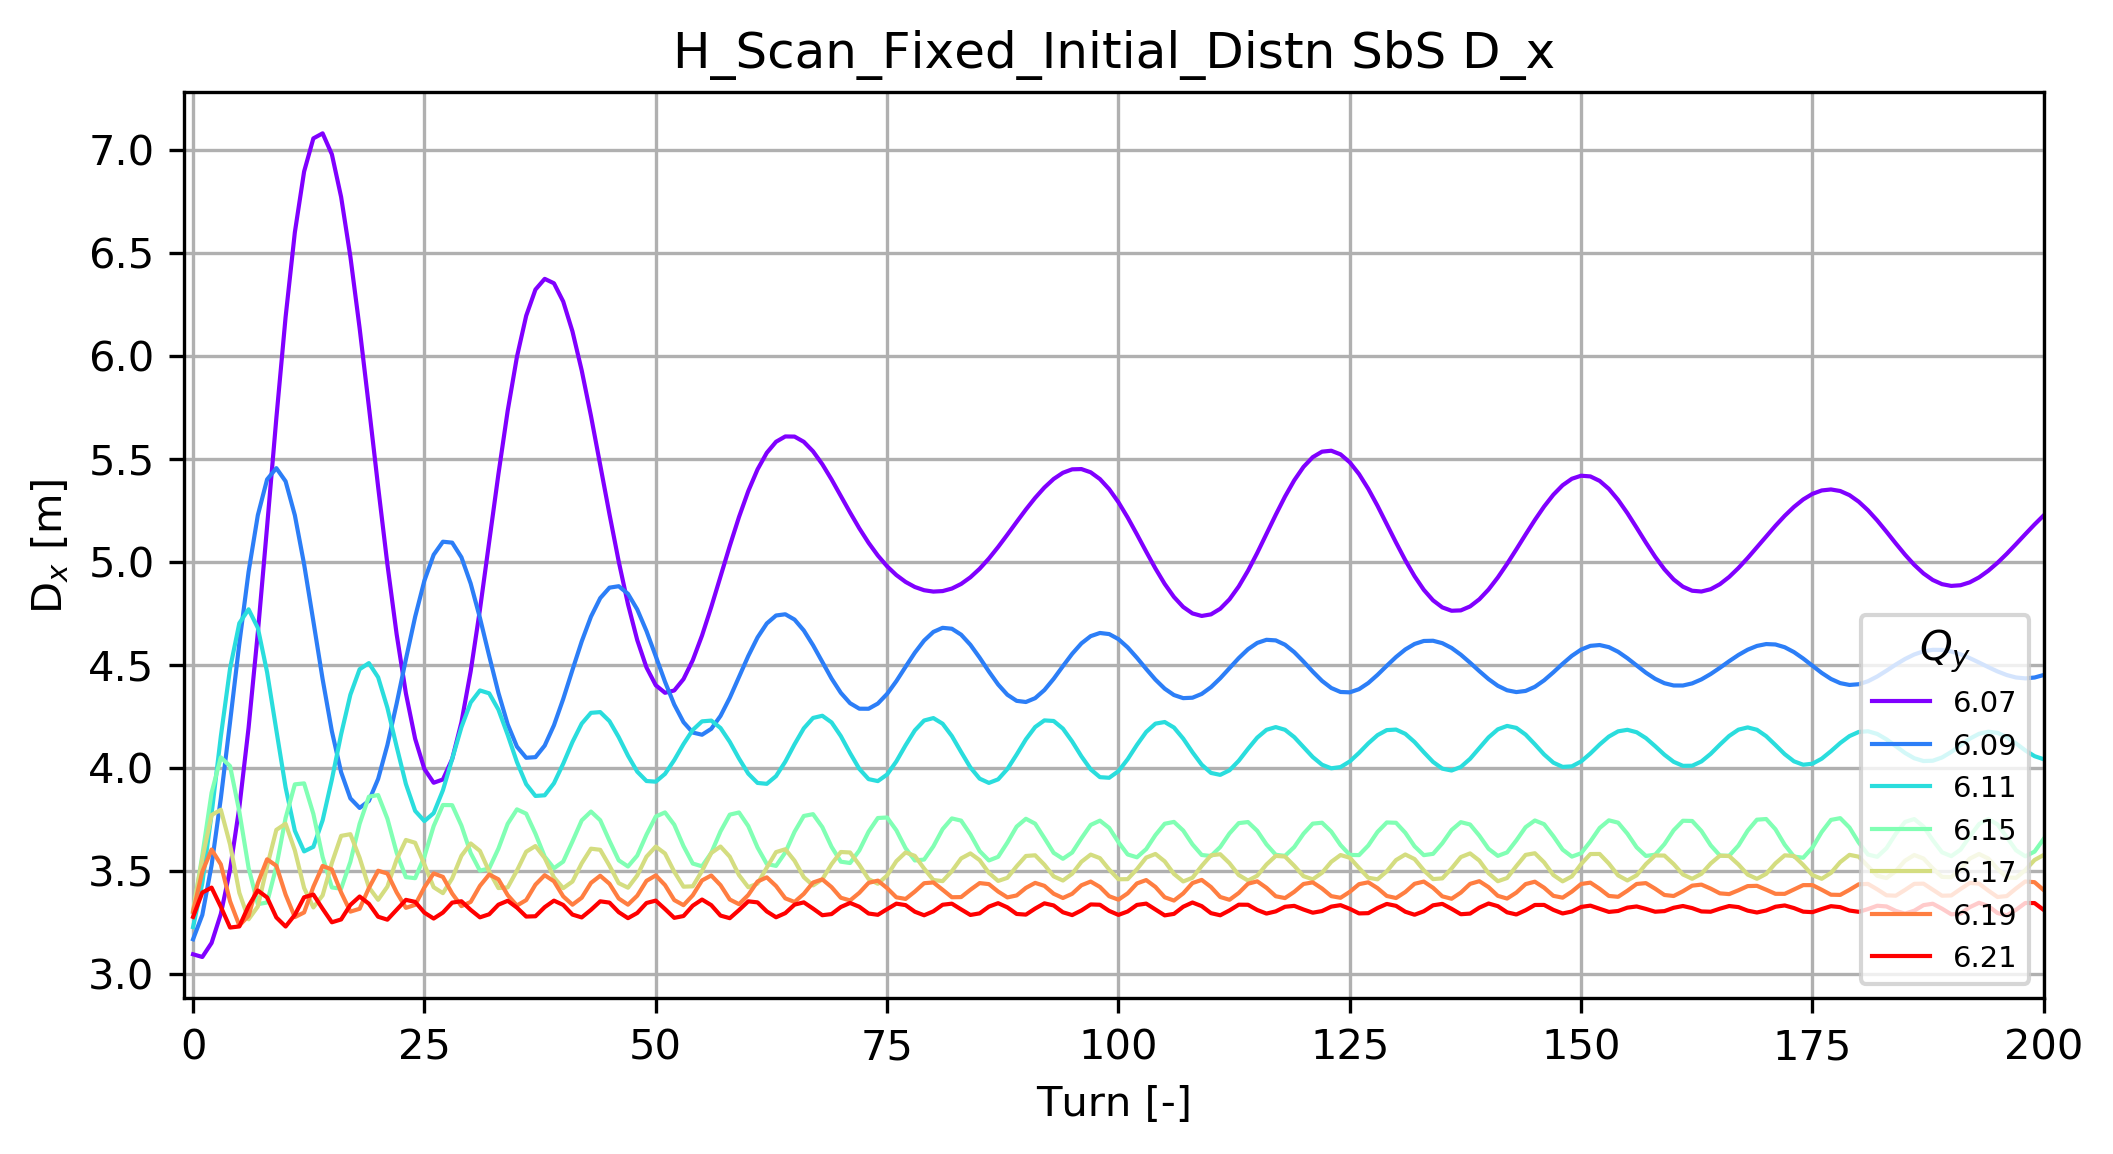

In [68]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,200)

savename = 'Param_' + parameter + '.png'
#plt.savefig(savename, dpi = 800);

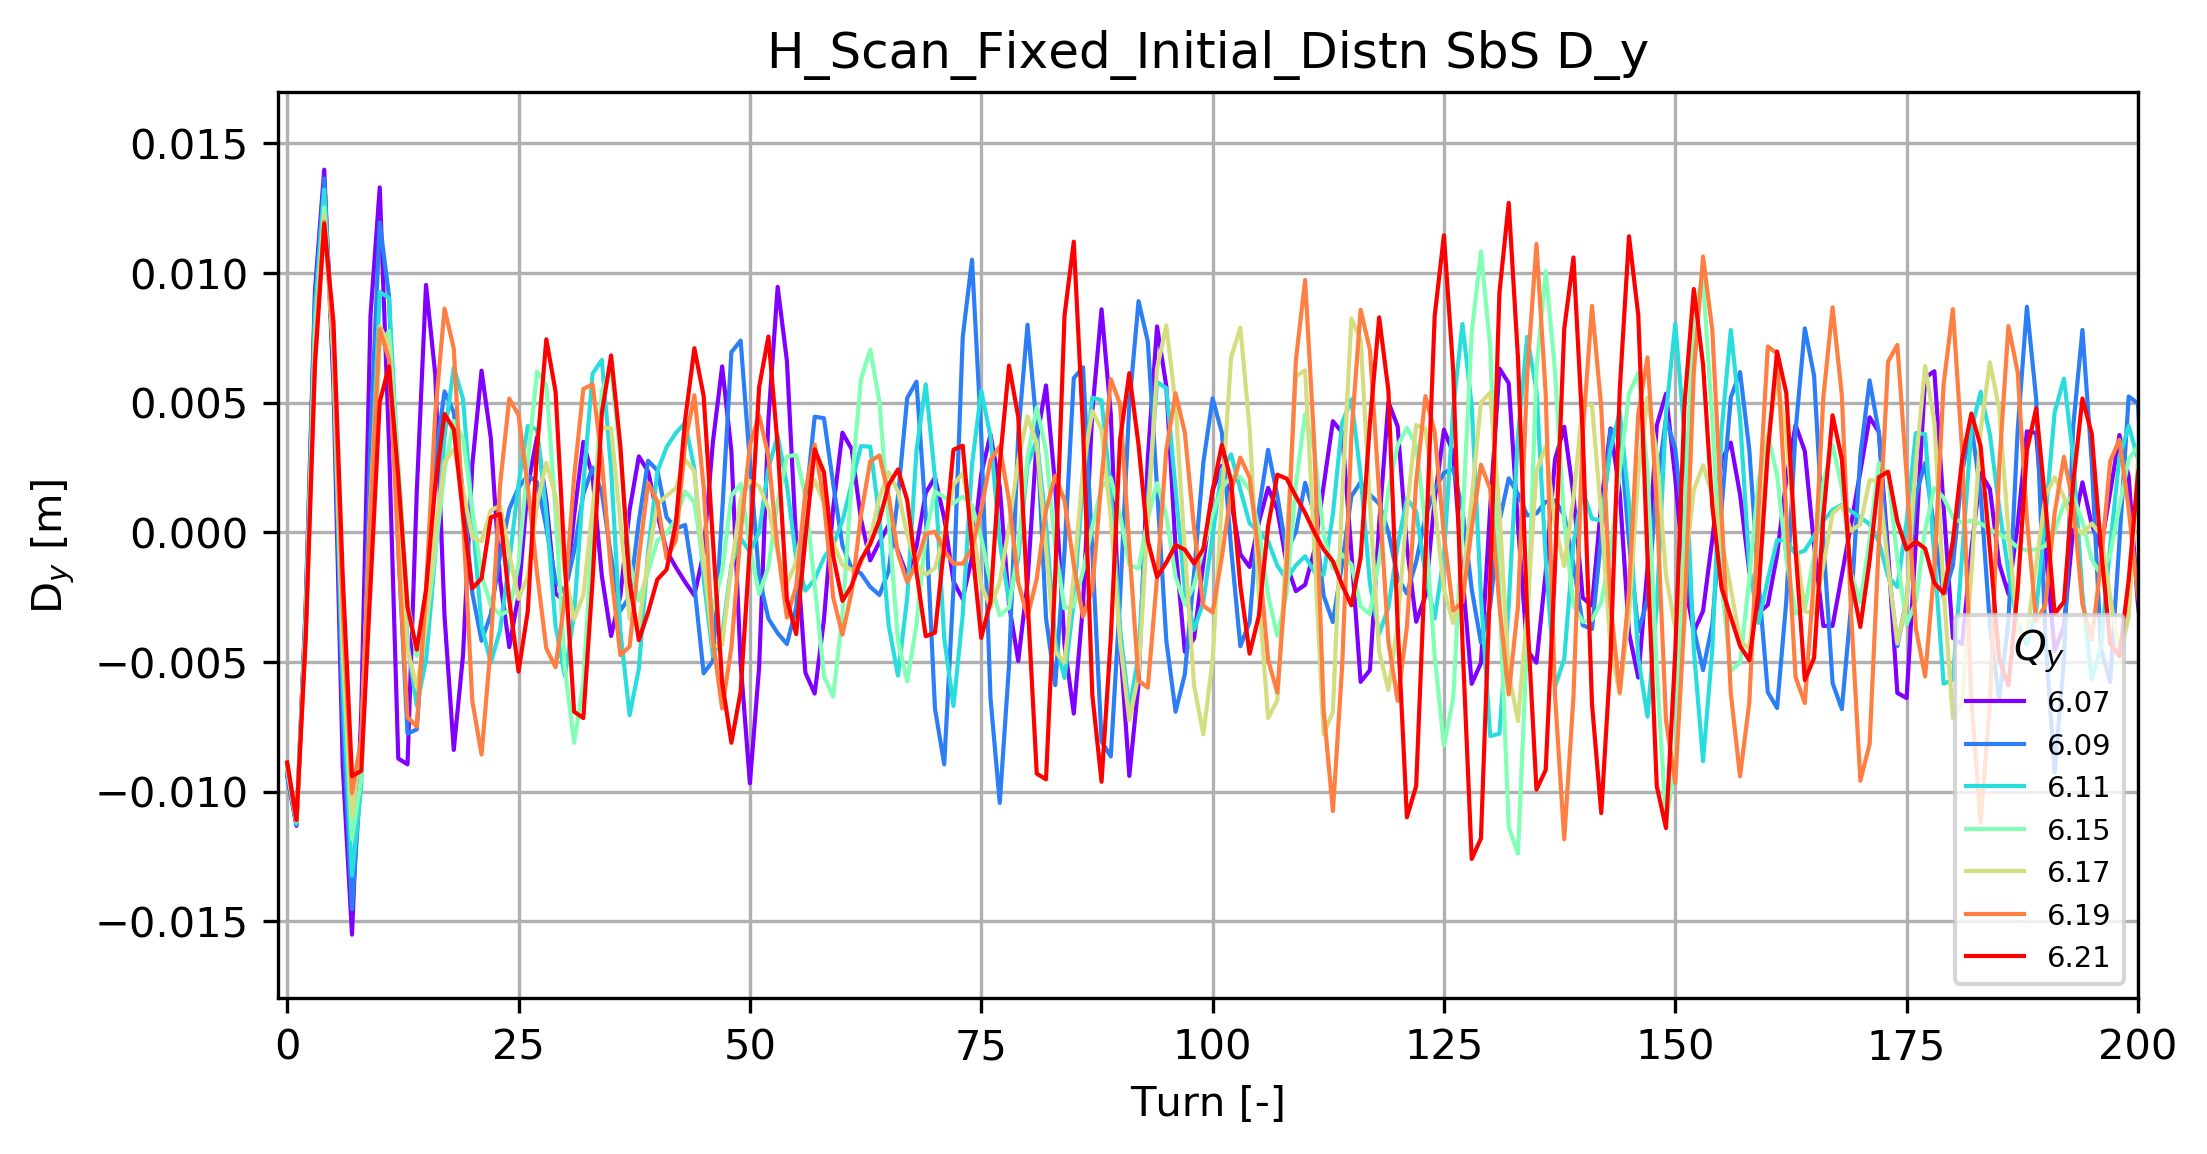

In [69]:
parameter = 'D_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,200)

savename = 'Param_' + parameter + '.png'
#plt.savefig(savename, dpi = 800);

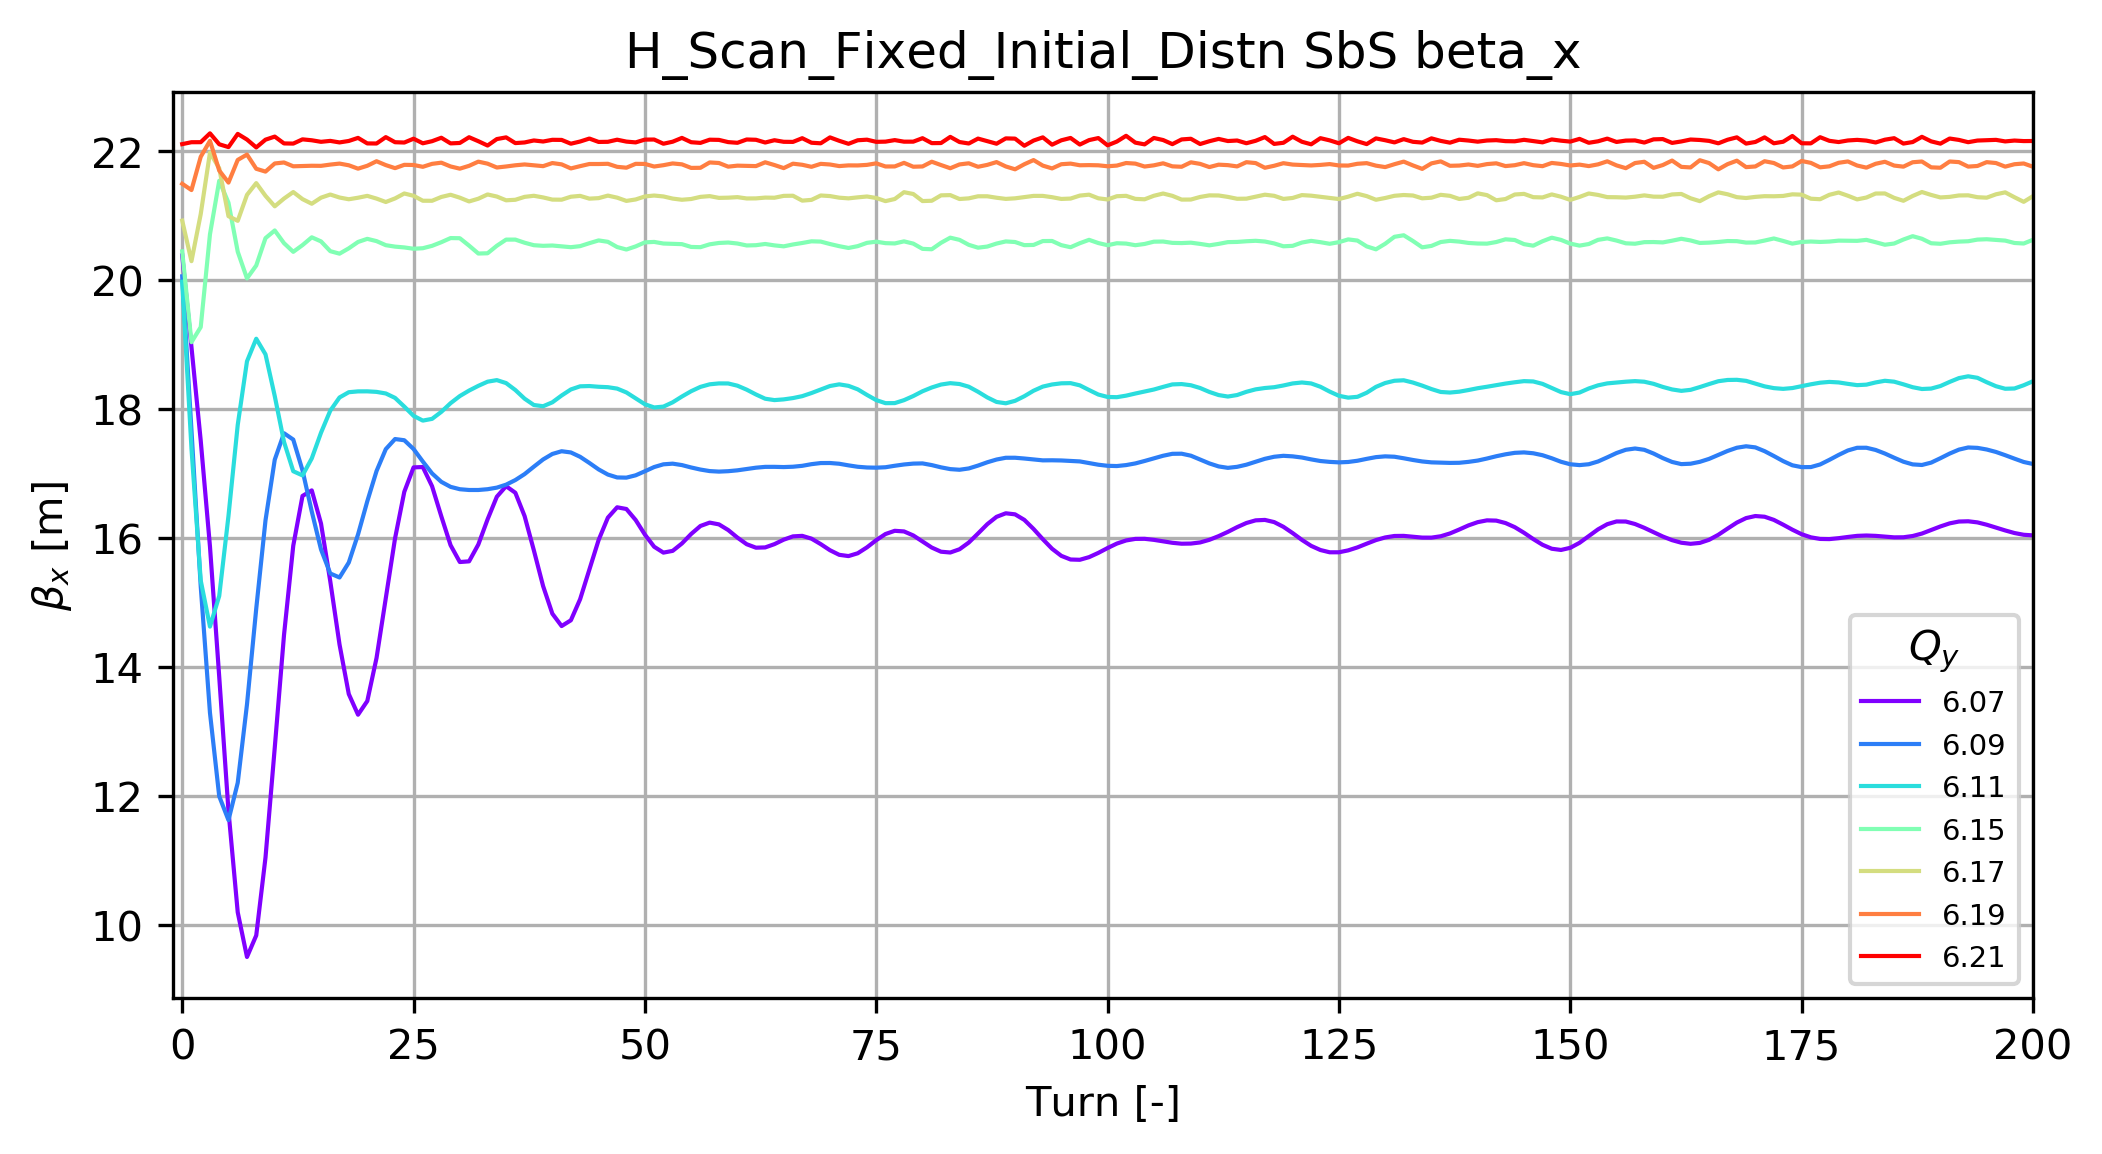

In [70]:
parameter = 'beta_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,200)

savename = 'Param_' + parameter + '.png'
#plt.savefig(savename, dpi = 800);

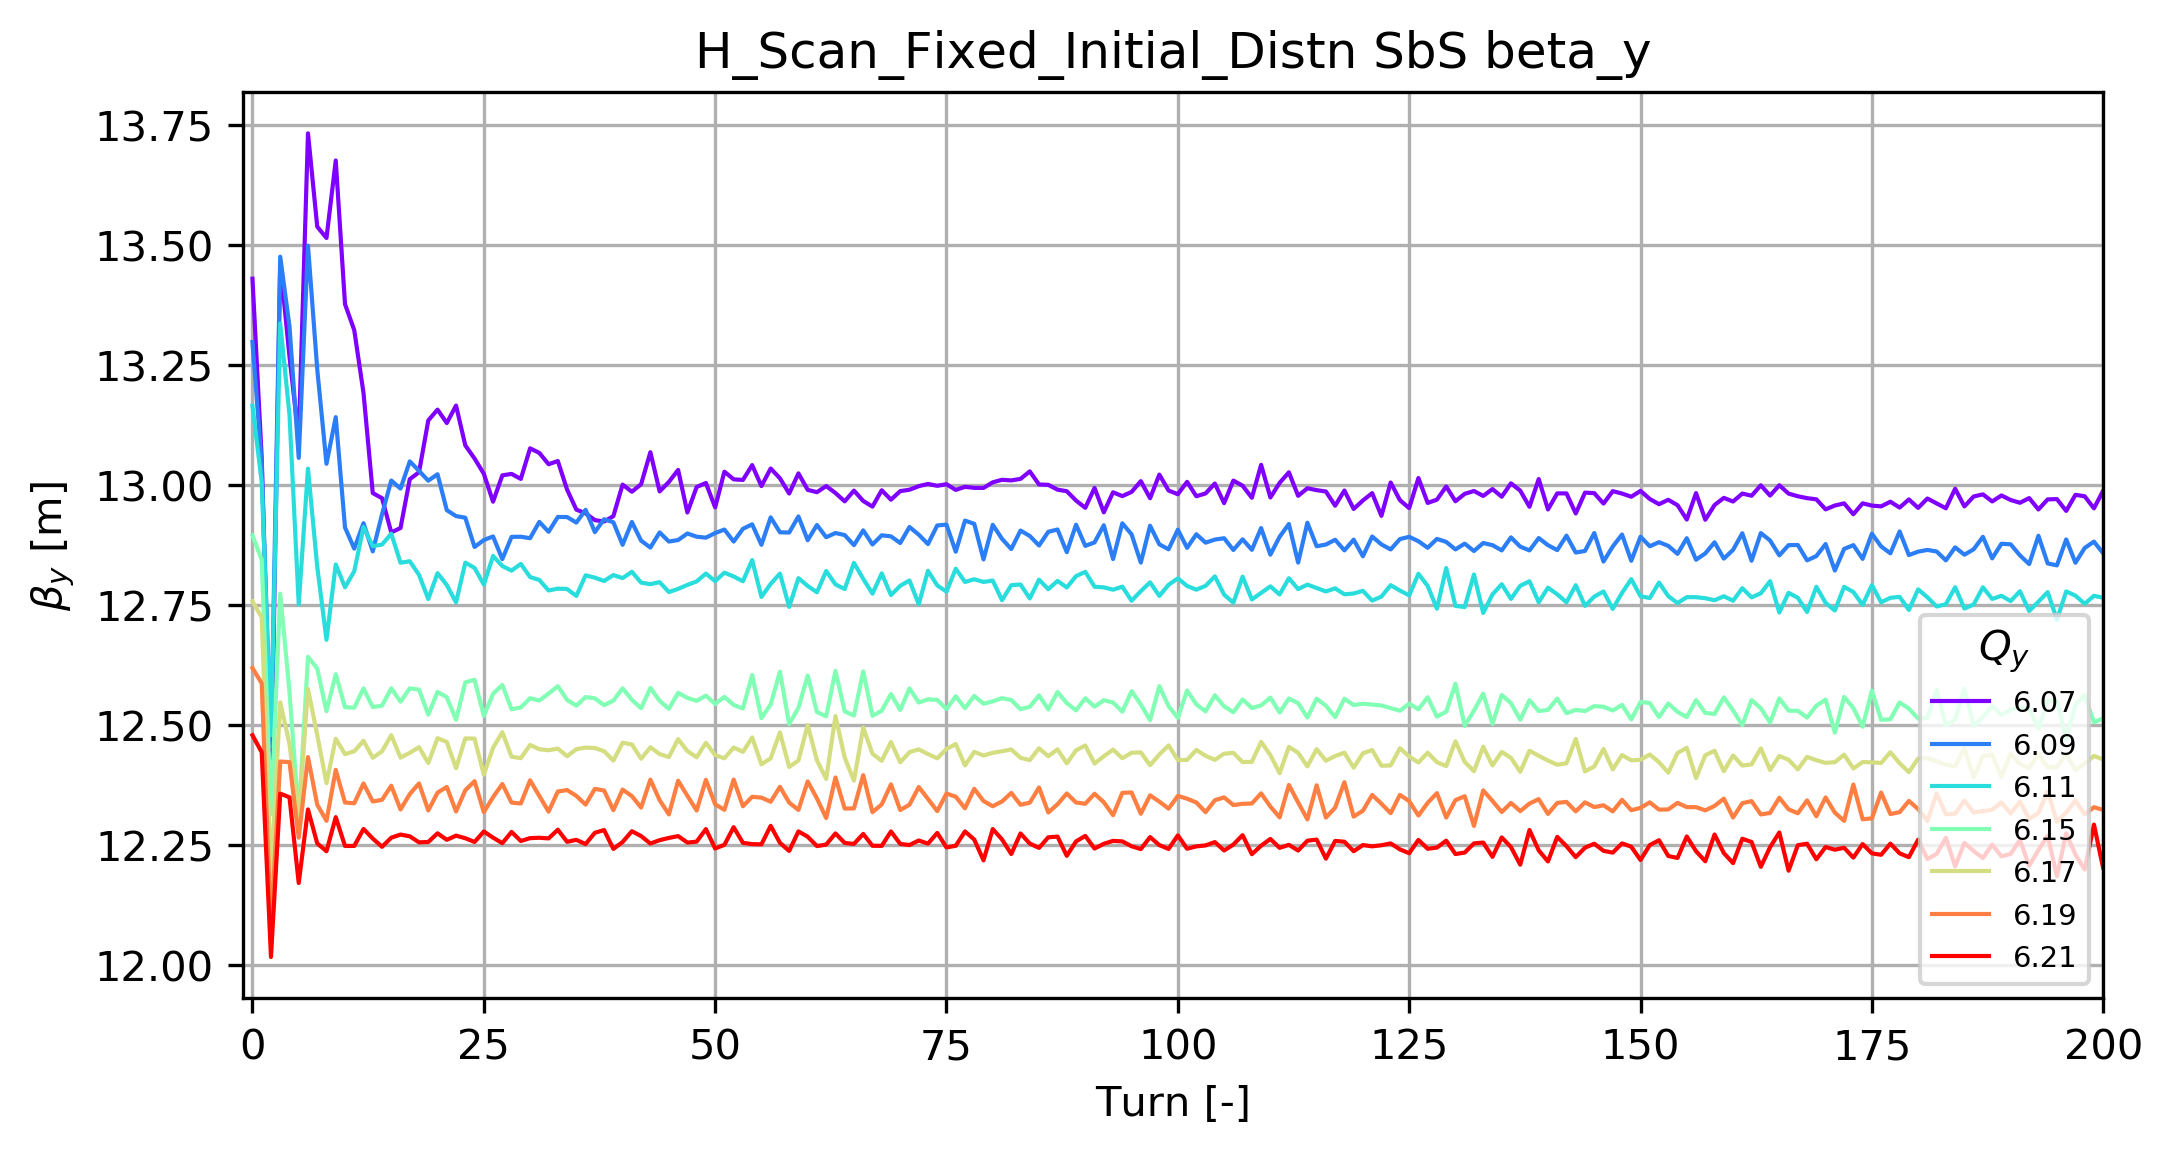

In [71]:
parameter = 'beta_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,200)

savename = 'Param_' + parameter + '.png'
#plt.savefig(savename, dpi = 800);

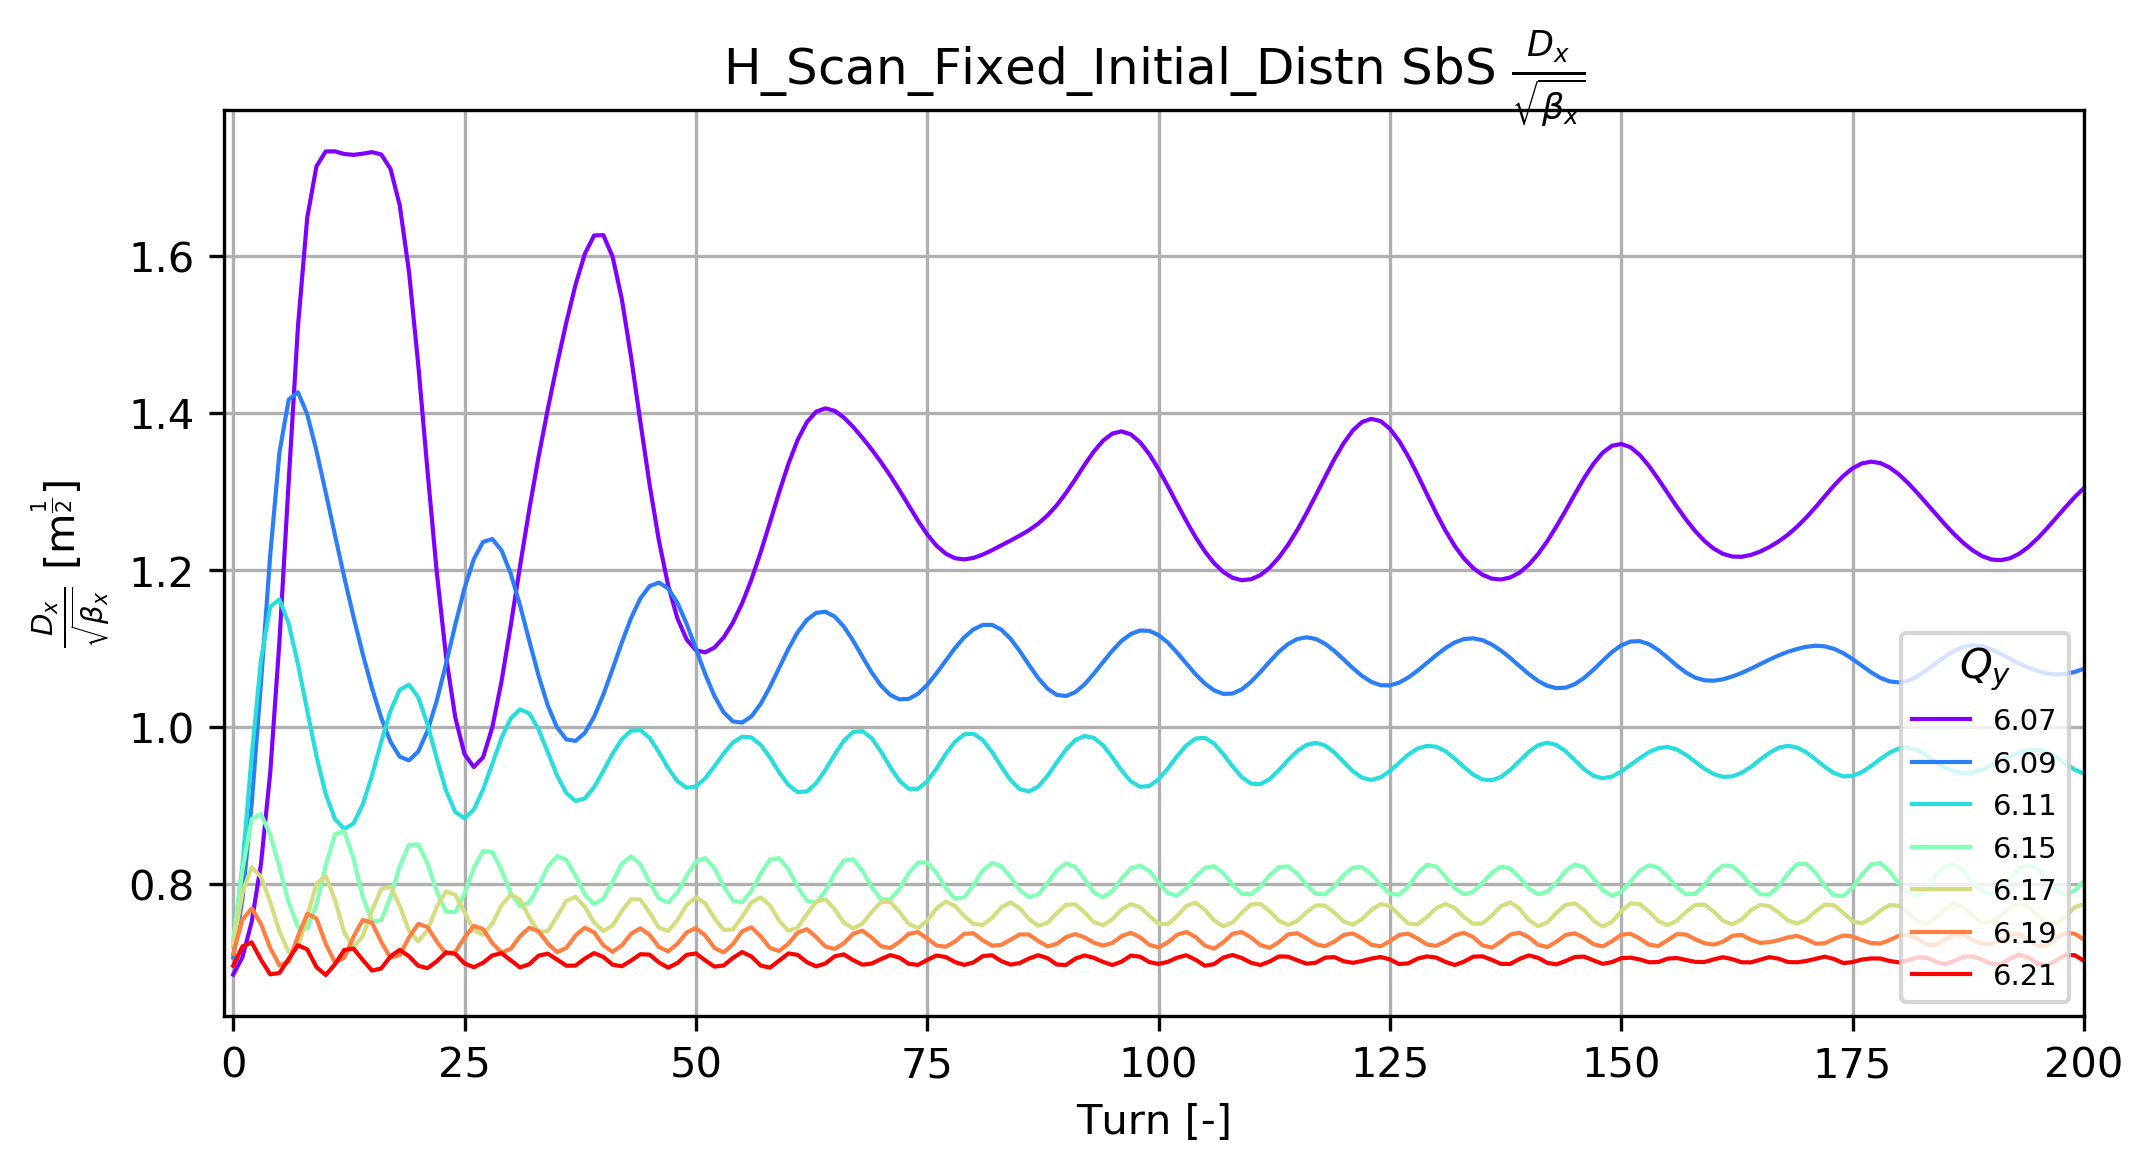

In [72]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + r'$\frac{D_x}{\sqrt{\beta_x}}$'
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{D_x}{\sqrt{\beta_x}}$ [m$^\frac{1}{2}$]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key]['D_x'][0]/np.sqrt(dd[key]['beta_x'][0]), label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,200)

savename = 'Param_' + parameter + '.png'
#plt.savefig(savename, dpi = 800);

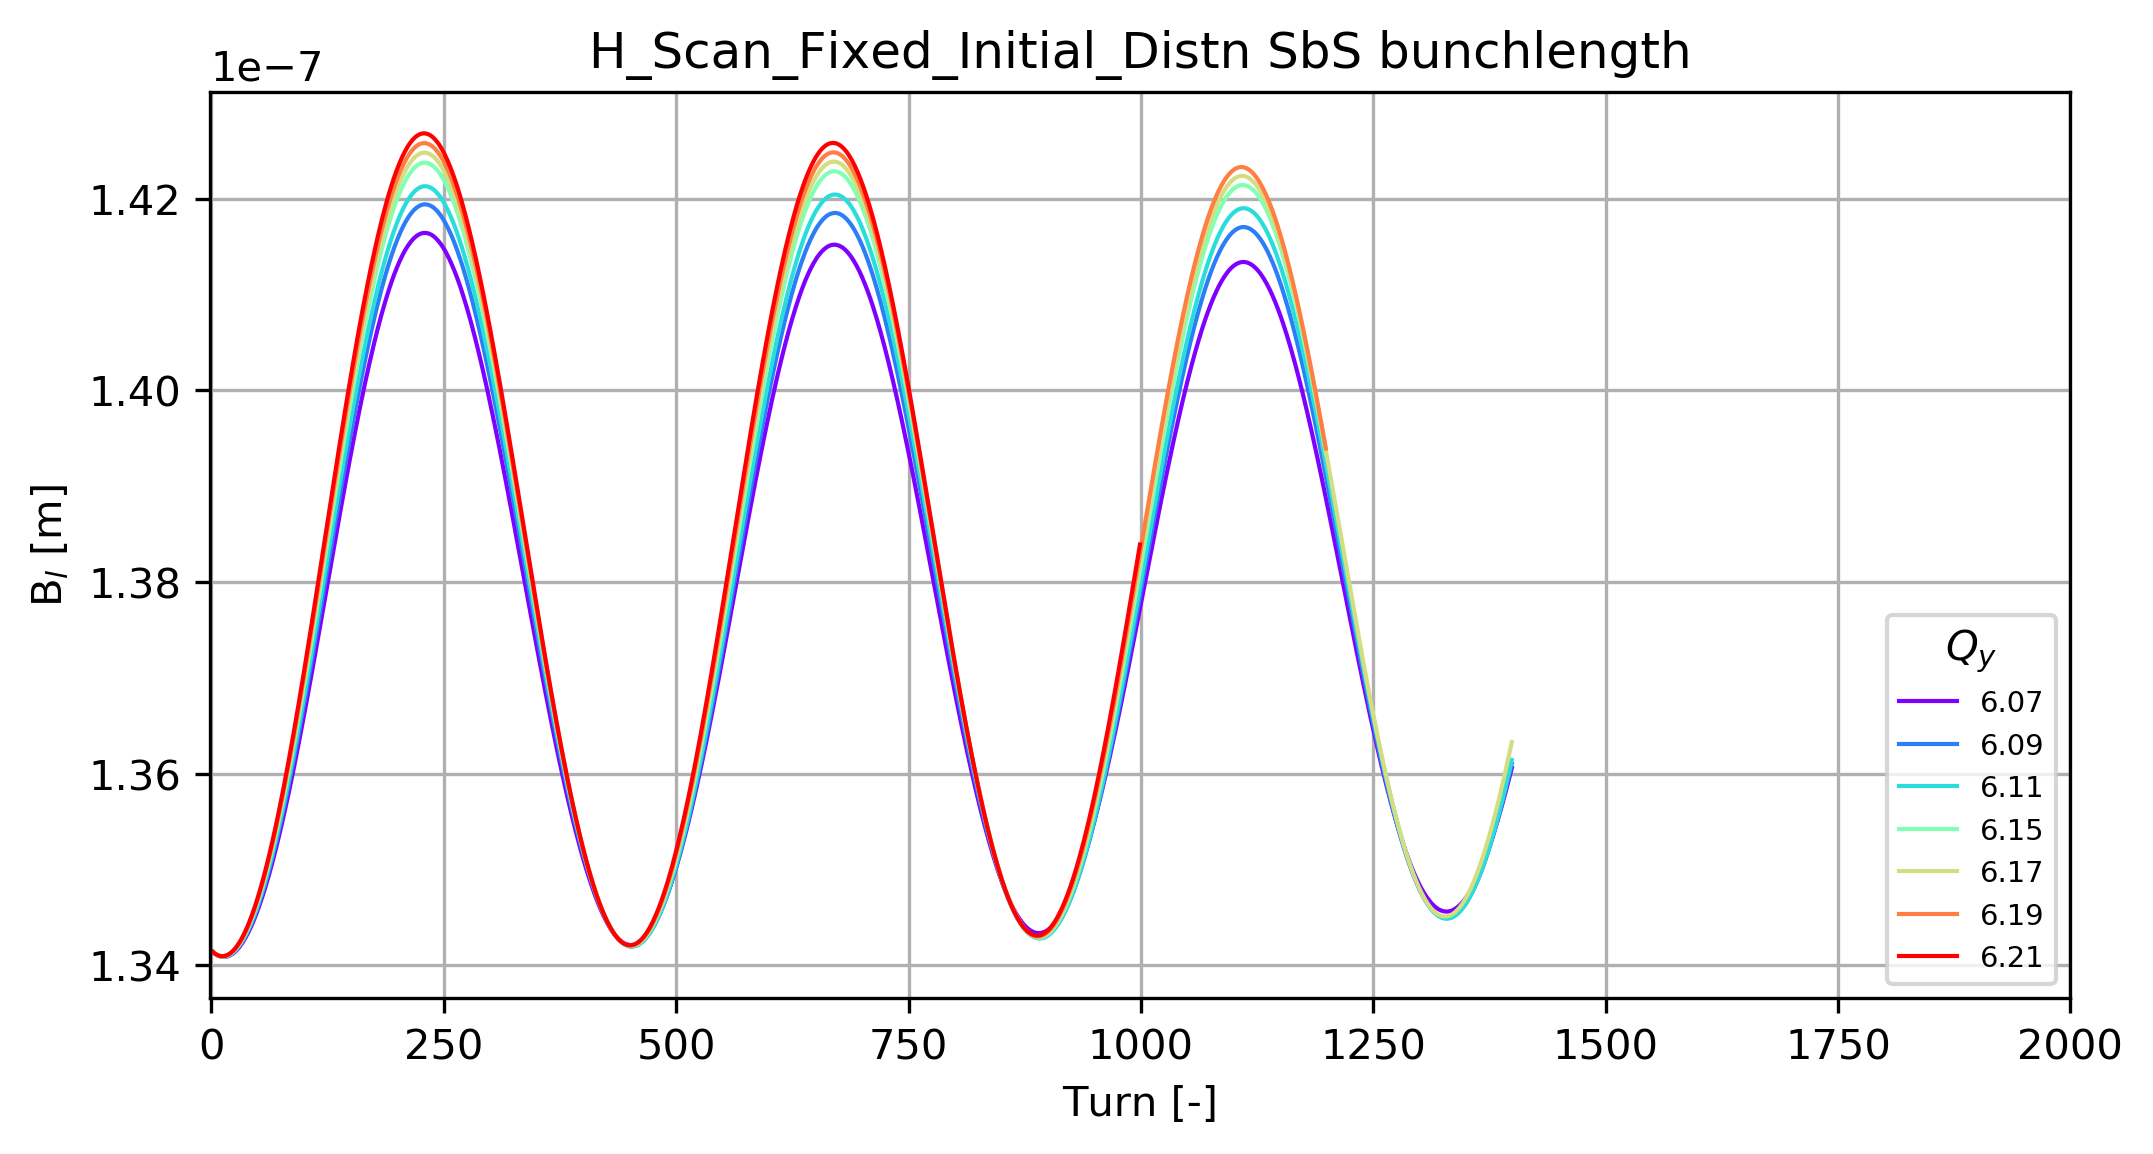

In [73]:
parameter = 'bunchlength'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'B$_l$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2000)
#ax1.set_ylim(1.342E-7, 1.3445E-7)

savename = 'Param_' + parameter + '.png'
#plt.savefig(savename, dpi = 800);

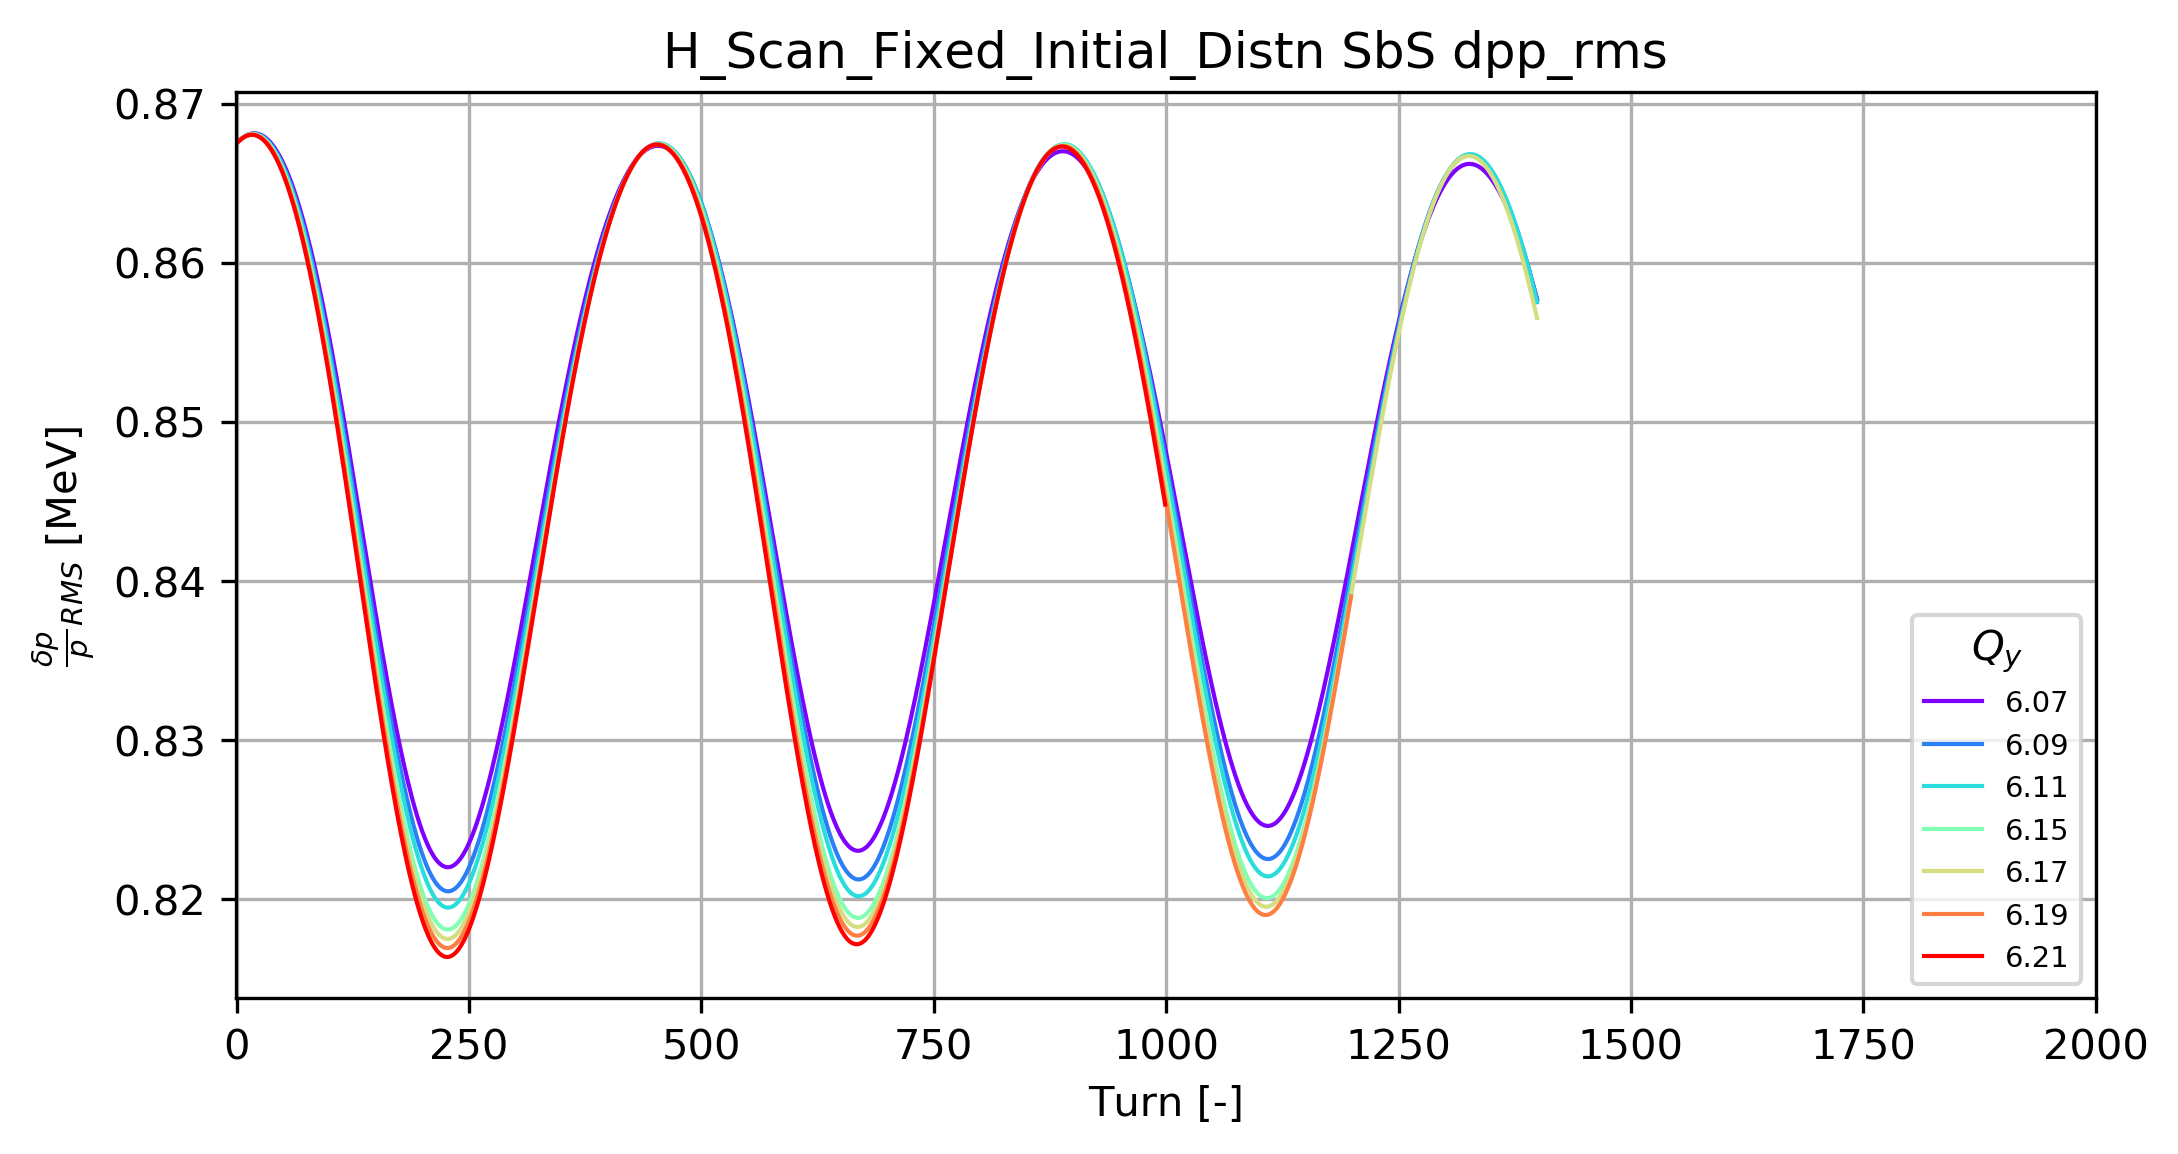

In [74]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2000)

savename = 'Param_' + parameter + '.png'
#plt.savefig(savename, dpi = 800);

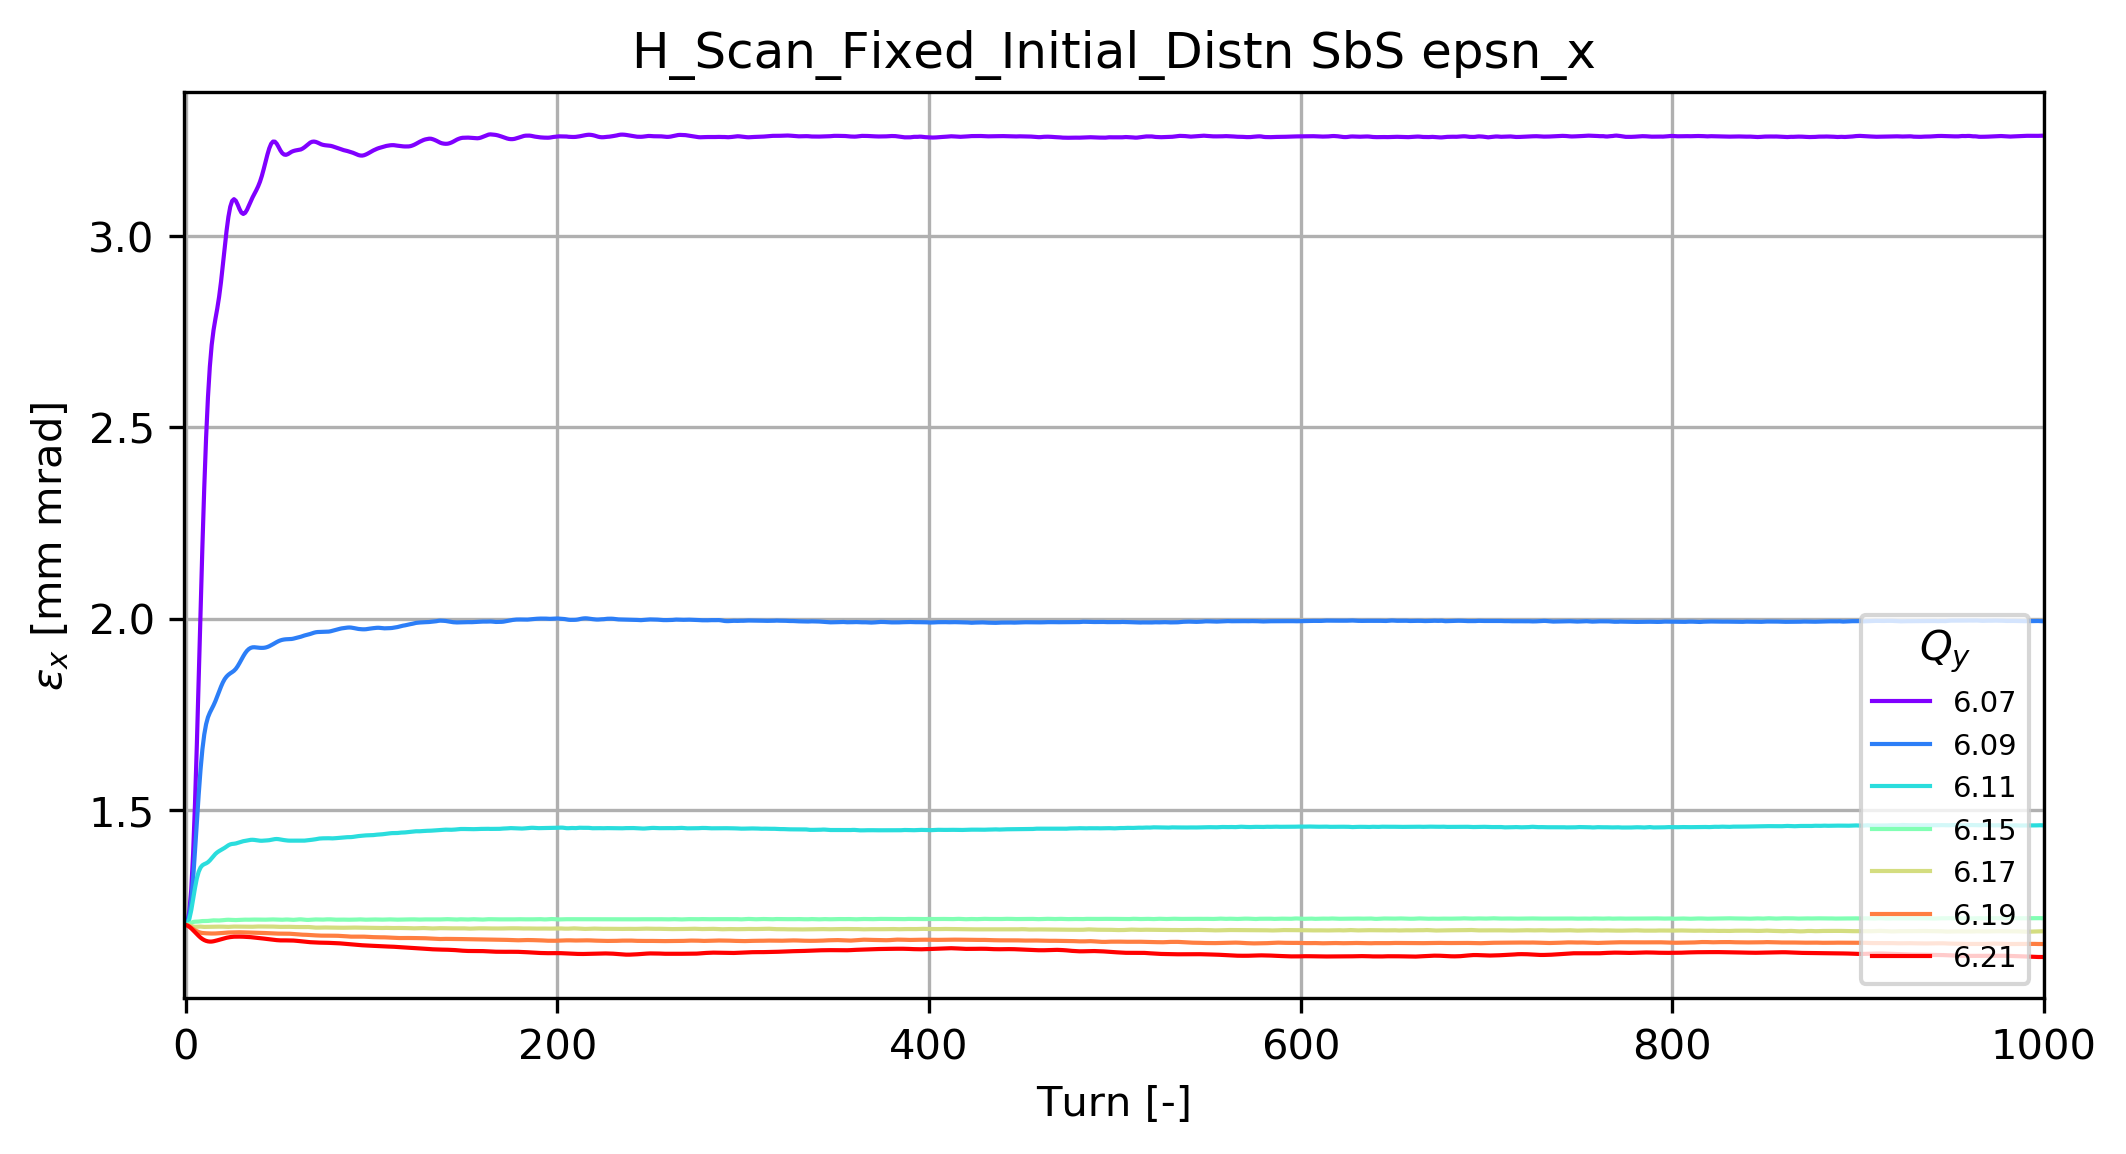

In [75]:
parameter = 'epsn_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,1000)

savename = 'Param_' + parameter + '.png'
#plt.savefig(savename, dpi = 800);

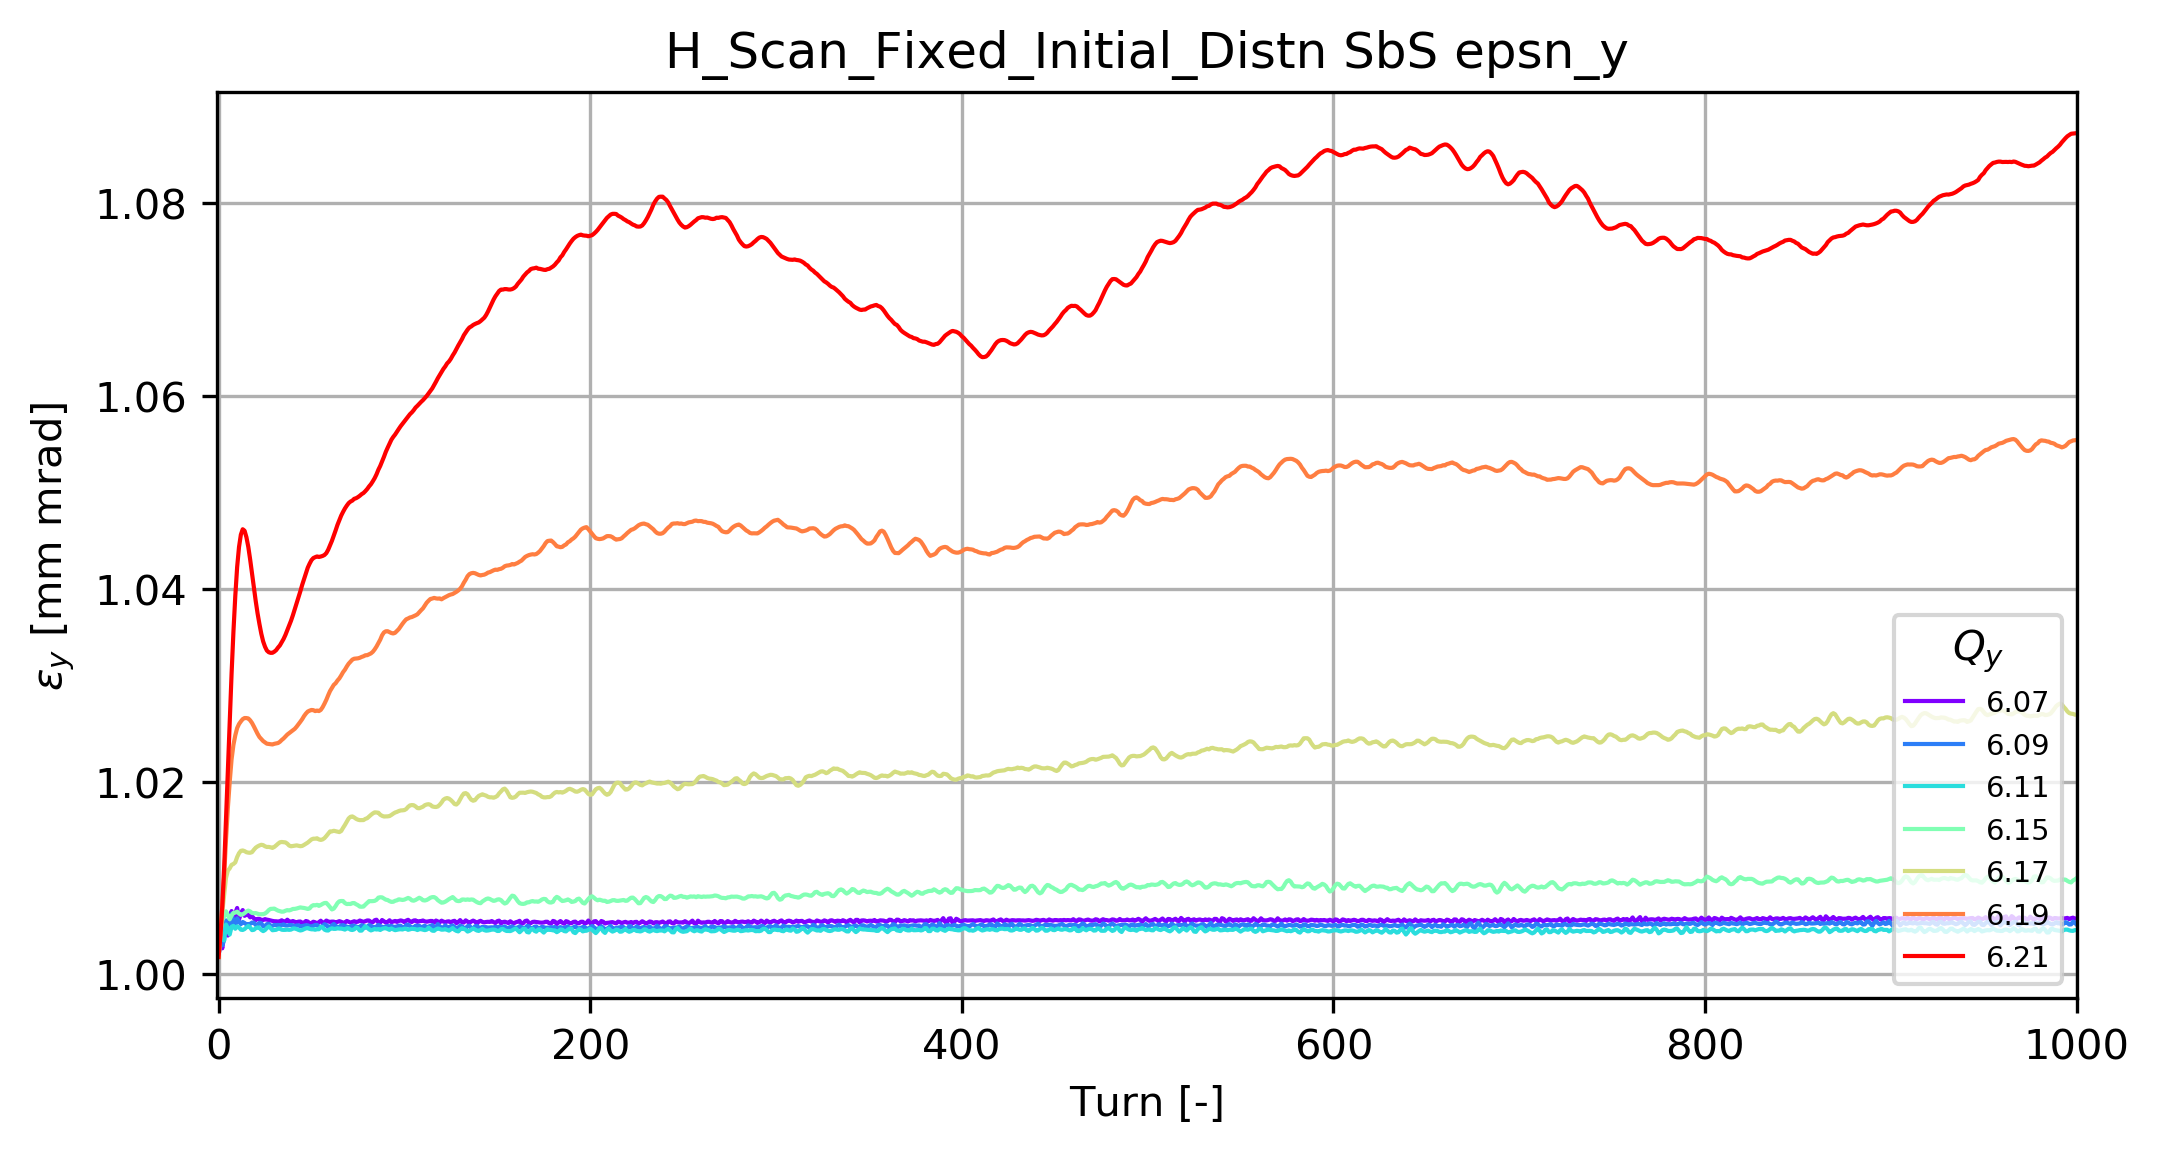

In [76]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,1000)

savename = 'Param_' + parameter + '.png'
#plt.savefig(savename, dpi = 800);

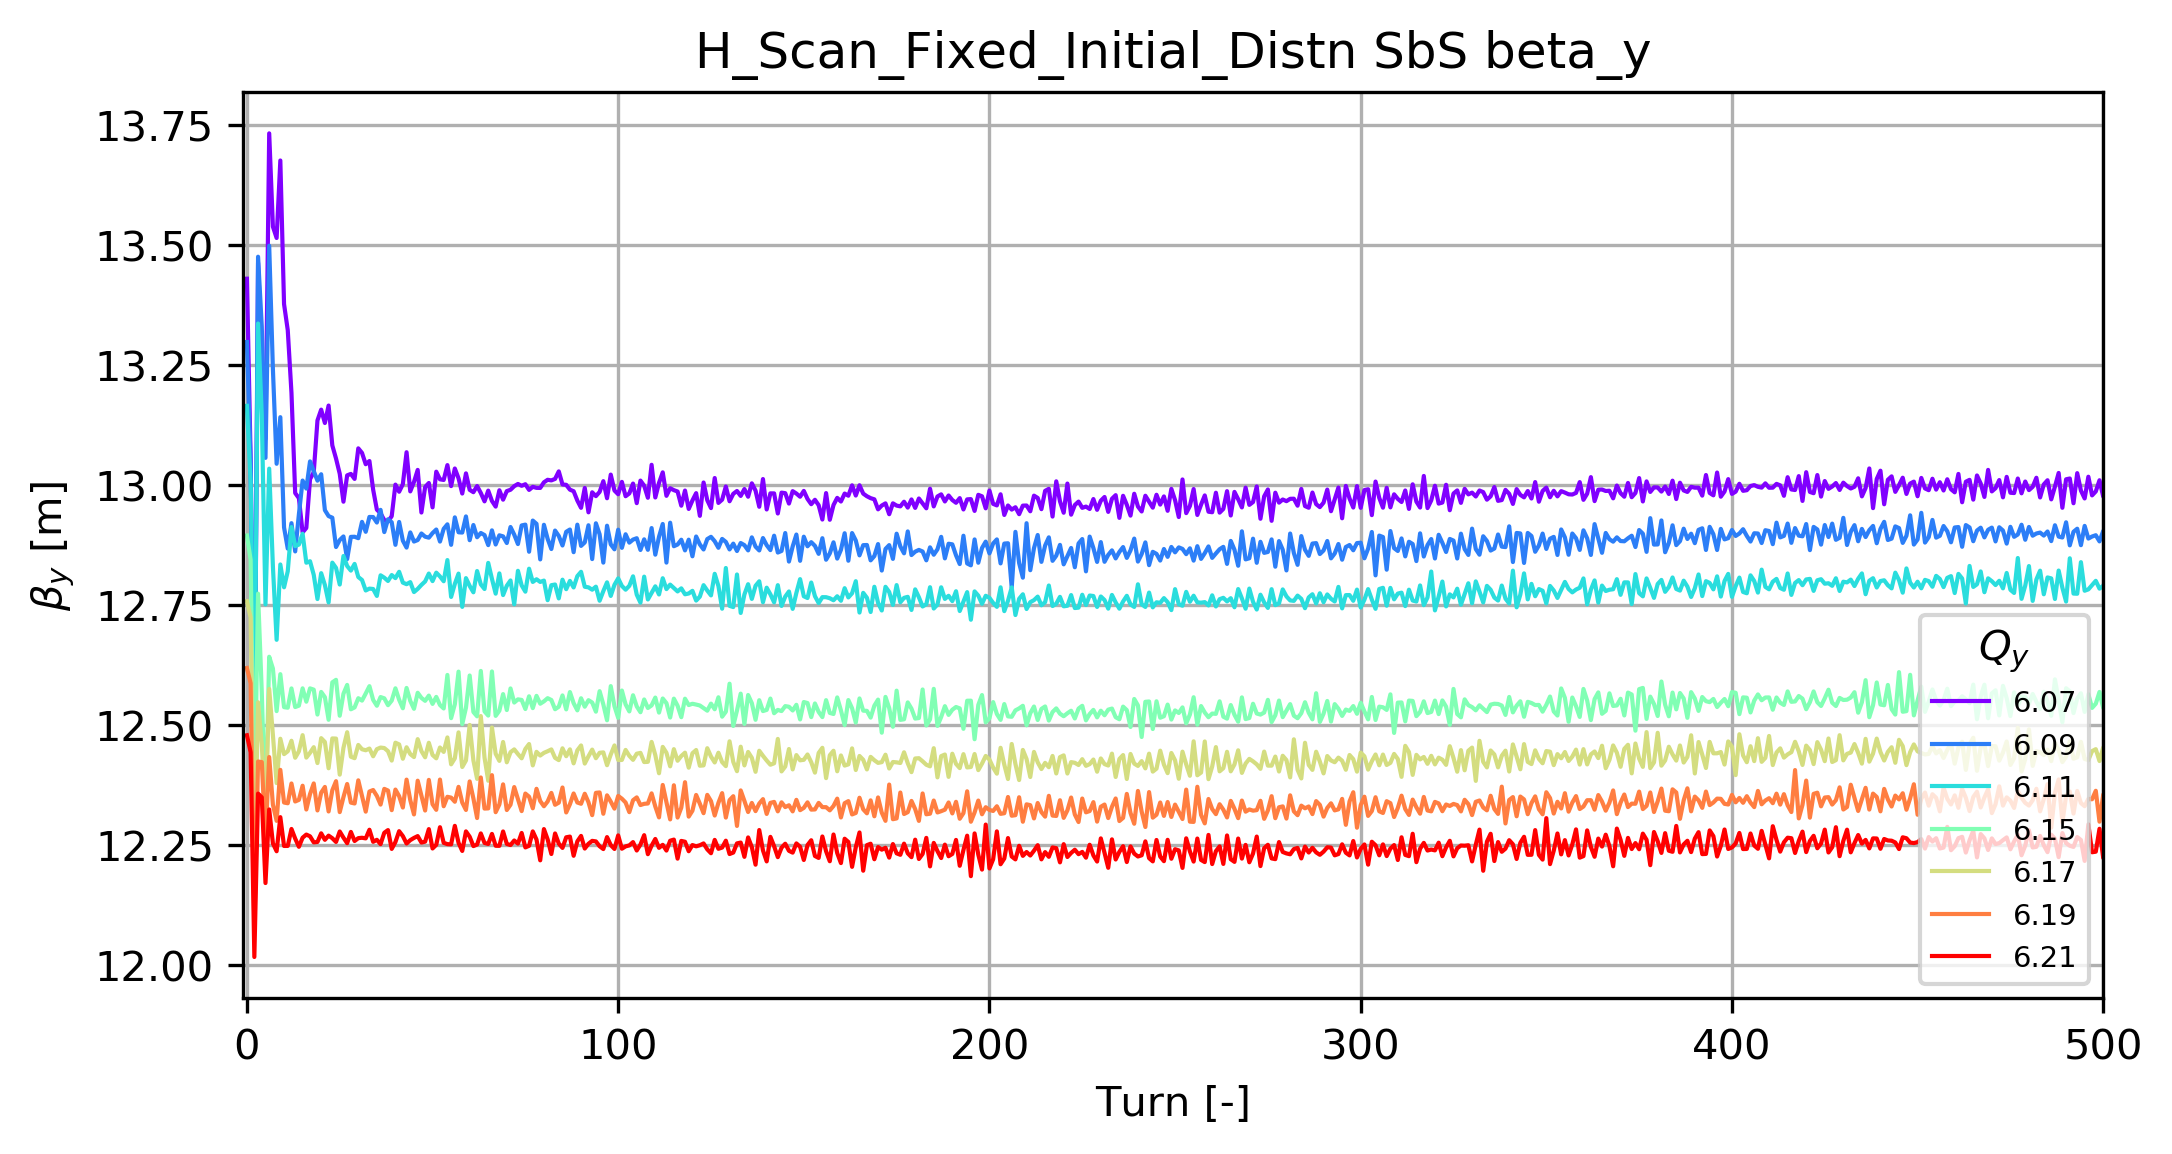

In [77]:
parameter = 'beta_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,500)

savename = 'Param_' + parameter + '.png'
#plt.savefig(savename, dpi = 800);